In [7]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# לולאות

בשיעור הזה נוסיף לארגז הכלים שלנו כלי חשוב מאוד – לולאות (loops). לולאות מאפשרות לנו להורות לפייתון להריץ מקטע קוד מסוים מספר פעמים (ולא פעם אחת בלבד כמו שראינו עד עכשיו).

בשיעור זה נציג את שני סוגי הלולאות הקיימים בפייתון – לולאות `for` ולולאות `while` - נתרגל את השימוש בהן ואפילו נפתור באמצעותן בעיות "מהעולם האמיתי".

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/KyOGXtnRg0M?si=jBNxht6KfkRhuozv" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

בסרטון הבא, נבין את ההבדל בין שני סוגי הלולאות `for` ו-`while` ומתי משתמשים בכל סוג
נתנסה בפייתון בשימוש בלולאות לפתרון בעיות
נלמד לזהות מצבים בהם לולאה לא תעצור
נפתור שתי בעיות מוכרות במדעי המחשב – זיהוי פלינדרום, וחישוב גורם ראשוני מינימלי של מספר
נבין את הקשר בין מספר האיטרציות לבין זמן הריצה של תוכנית
נלמד להבחין בין תוכניות בעלות זמן ריצה ליניארי וריבועי

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/l6xoRiJsq2k?si=goTJYDXHsSJ6i_S3" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [23]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "לאיזו מהמשימות הבאות מתאים להשתמש בלולאת for?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הפעלה של מגב לניקוי חלון הרכב עד למצב בו השמשה נקייה",
            "correct": false,
            "feedback": "לא נכון. מדובר בתהליך שתלוי בתנאי הפסקה ולא במספר קבוע של חזרות."
        },
        {
            "answer": "הוצאת מנות מהמטבח למסעדה כל עוד ישנם סועדים רעבים במסעדה",
            "correct": false,
            "feedback": "לא נכון. מספר החזרות אינו ידוע מראש – תלוי במצב משתנה."
        },
        {
            "answer": "מעבר על מילים במסמך טקסט לצורך מציאת המילה הנפוצה ביותר",
            "correct": true,
            "feedback": " נכון – זה מתאים יותר ללולאת for העוברת על רשימה סופית."
        },
        {
            "answer": "חישוב ממוצע ציונים בקורס מתוך רשימת הציונים של הסטודנטים",
            "correct": true,
            "feedback": "נכון – כשיש לך רשימה נתונה, לולאת for מתאימה יותר."
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

# לולאת `for`

#### תחביר
```python
for element in iterable:
    statement1
    statement2
    …
rest of code…
```
#### מעבר על כל איברי iterable (רשימה, מחרוזת וכו')
- איטרציה 0: הקצה `element = iterable[0]`  
בצע `statement1`, `statement2`, …

- איטרציה 1: הקצה `element = iterable[1]`  
בצע `statement1`, `statement2`, …
…
- אין עוד איברים ברשימה - "קפוץ" לשאר הקוד (כלומר, לצאת מהלולאה)

### תרגול

ממשו את הפונקציה count_char המופיעה בחלונית הקוד. הפונקציה מקבלת כקלט מחרוזת s ותו c. הפונקציה תעבור על תווי המחרוזת s, תספור כמה פעמים מופיע בה התו c, ותחזיר את מספר זה.

כפי שאתם ודאי שמים לב, התרגיל מאוד דומה לתרגיל הקודם. למעשה, זוהי הכללה של התרגיל הקודם - התרגיל הקודם עסק במקרה הפרטי, בו חיפשנו תו מסוים (רווח), בעוד כאן אנחנו רוצים שהפונקציה תדע לספור את מספר ההופעות של כל תו שתקבל כקלט. אם נריץ את הפונקציה כאשר c הוא רווח (כלומר, התו שאת מספר ההופעות שלו סופרים הוא רווח), נקבל פעולה זהה לזו של הפונקציה מהתרגיל הקודם.

הנחיות: ניתן להיעזר בקוד מהתרגיל הקודם (מימשנו עבורכם את הפתרון שלנו לתרגיל הקודם בחלונית הקוד הנוכחית).

לאחר שפתרתם את התרגיל, הריצו את הקוד וצפו בתוצאות בחלונית הפלט.

In [7]:
def count_spaces(s):
    cnt = 0
    for char in s:
        if char == " ":
            cnt = cnt+1
    return cnt


def count_char(s, c):
    # delete pass and fill in your code below
    pass

### TESTS ###

print("********************")
print("Starting the test:")

print("********************")
print("Counting spaces in 'Hello world!'")
ans = count_char("Hello world!", " ")
if ans == 1:
    print("CORRECT: Very good, 'Hello world!' has one space")
else:
    print("WRONG: 'Hello world!' has one space but the code returned", ans)

print("********************")
print("Counting 'a' in 'I hate bananas'")
ans = count_char("I hate bananas", "a")
if ans == 4:
    print("CORRECT: Very good, 'I hate bananas' has 4 a's")
else:
    print("WRONG: 'I hate bananas' has 4 a's but the code returned", ans)

print("********************")
print("Counting 'z' in 'it's not here'")
ans = count_char("it's not here", "z")
if ans == 0:
    print("CORRECT: Very good, 'it's not here' has no z's")
else:
    print("WRONG: 'it's not here' has no z's but the code returned", ans)
    
print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")



********************
Starting the test:
********************
Counting spaces in 'Hello world!'
WRONG: 'Hello world!' has one space but the code returned None
********************
Counting 'a' in 'I hate bananas'
WRONG: 'I hate bananas' has 4 a's but the code returned None
********************
Counting 'z' in 'it's not here'
WRONG: 'it's not here' has no z's but the code returned None
********************
Tests concluded, add more tests of your own below!
********************


## אובייקטים איטרביליים (iterables)

### מהם אובייקטים איטרביליים (iterables)  

- אובייקטים איטרביליים הם מטיפוס המייצג **סדרת ערכים** ומאפשר ומאפשר **מעבר עליהם בזה אחר זה**
- אובייקטים אלו נמצאים בשימוש בתרחישים בהם הפעולה דורשת מעבר על כל אובייקט מתוך סדרת אובייקטים
- ספציפית, לולאות for מבצעות מעבר על אובייקטים איטרביליים. 

In [21]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "אילו מהסוגים הבאים הם איטראביליים (iterable)?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "int",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "str",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "list",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "bool",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## לולאות `for` על `range`

ראינו כיצד לולאות `for` מאפשרות מעבר על איברי רשימה או תווי מחרוזת בזה אחר זה. לולאות for שימושיות מאוד גם כאשר רוצים לעבור על טווח (range) של מספרים שלמים, למשל על כל המספרים השלמים בין 1 ל-100. יש לזה הרבה שימושים שנפגוש במהלך הקורס. שימוש אחד מיידי שמייד נראה, הוא מעבר על אינדקסים של רשימה או מחרוזת. 

הדוגמה שתלווה אותנו כאן היא הבעיה הבאה: אנחנו רוצים לחשב את סכום המספרים השלמים בין 1 לבין מיליון. חלקכם אולי יודעים שיש לזה נוסחה, וגם נציג אותה בהמשך, אבל כרגע "נשכח" ממנה כדי להדגים איך משתמשים בלולאות כדי לפתור את הבעיה.



### חישוב סכום של טווח מספרים

אילו רצינו לחשב את סכום המספרים השלמים בין 1 ל-10, זה לא היה דורש שימוש בלולאות בכלל. פשוט כותבים בפייתון: 
```python
print(1+2+3+4+5+6+7+8+9+10)
```
ומקבלים את התוצאה (55 אגב, למי שלא יכול לחכות...).

אבל לא סביר לפעול בגישה הזו לחישוב סכום המספרים בין 1 למיליון, שזה 10 בחזקת 6 (1 עם 6 אפסים אחריו, ובפייתון נזכיר שכותבים זאת 10**6 – ראיתם זאת בשיעור 1). זה אמנם אפשרי, תאורטית, אבל לא מעשי בכלל, אלא אם ממש משעמם לכם ואתם לעולם לא מתעייפים.... 

זה בדיוק הזמן להכיר טיפוס חדש בפייתון –`range`. הטיפוס `range` מאפשר להגדיר בקלות רבה טווח של מספרים. צריך לציין מהו המספר הראשון ומהו המספר האחרון, כלומר את טווח (range) המספרים, וזהו!

הטיפוס range שנלמד עליו כעת הוא סוג של iterable המכיל מספרים שלמים. בדומה לאובביקטים מטיפוסים `str` ו`list`, גם על `range` אפשר לעבור על איבריו באמצעות לולאת `for`, בדיוק כפי שעשינו עם רשימות ומחרוזות.

In [32]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "עצרו וחשבו: האם הפונקציה המובנית sum של פייתון לא מספיקה כדי לפתור את בעית סכימה המספרים מאחד למליון בקלות?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "הצג תשובה",
            "correct": true,
            "feedback": "לא. אמנם הפונקציה sum של פייתון מאפשרת לחשב בפקודה אחת סכום של רשימת מספרים, אבל איך נבנה רשימה כזאת? לכתוב lst = [1, 2, 3, ..., 1000000] יהיה מאוד מסורבל ולא יעיל. פתרון טוב יותר יהיה להשתמש ב-iterables (כמו range), שמייצג את המספרים מבלי לכתוב אותם במפורש ולשמור בזכרון."
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

כעת נדגים בקוד הבא שימוש ב`range` עם לולאת `for` 

In [29]:
# Simple for loop over range
for num in range(3, 17):
	print(num)


3
4
5
6
7
8
9
10
11
12
13
14
15
16


רגע רגע... כפי שראיתם, המספרים שהודפסו הם כל המספרים השלמים בין 3 לבין... 16? לאן נעלם 17? התשובה היא שכאשר מגדירים טווח מספרים באמצעות range בפייתון, סוף הטווח, כלומר המספר השני שמציינים, לא כלול בטווח. זה קצת מבלבל, אבל פשוט צריך לזכור את זה. יש בזה משהו נוח, כפי שנראה בהמשך.

אז אילו רצינו להדפיס את כל המספרים השלמים בין 3 ל-17 היינו צריכים לרשום:
```python
for num in range(3, 18):
    print(num)
```
באופן כללי, range(a,b) בפייתון מגדיר את טווח המספרים השלמים בין a (כולל) ל-b (לא כולל).

"איזה מספר יודפס בסוף ריצת מקטע הקוד שלפניך? 
```python
p = 1
for num in range(1, 5): 
    p = p * num
print(p)
```

In [44]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 24,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "נסה שוב. טיפ: מדובר במכפלה של המספרים 1 עד 4."
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

מכאן הדרך קצרה לכתיבת תוכנית שמחשבת סכום של סדרת המספרים השלמים בין 1 ל-10**6. בפסאודו קוד זה ייראה כך:

חישוב הסכום 1+2+...+10**6:

1. הגדר משתנה סכום בשם s ואתחל אותו באפס

2. לכל מספר בטווח בין 1 לבין 10**6, נסמנו num:

      2.1 הגדל את s ב-num

3. הדפס את s

ובפייתון זה ייראה כך (הריצו ובידקו מהו הסכום המתקבל):

In [45]:
# Simple for loop summing over range
s = 0
for num in range(1, 10**6+1):
    s = s+num
print(s)


500000500000


שימו לב שהטווח הוגדר ע"י `range(1, 10*\*6+1)` כדי לכלול בו גם את 10*\*6.

התוכנית הזאת עובדת מצויין. אבל דמיינו שאתם כותבים תוכנית ארוכה, ובכמה מקומות בתוכנית שלכם צריך לחשב סכום של טווח מספרים, טווח אחר בכל פעם. במקום להעתיק את 4 השורות האלו בכל פעם ולשנות את הגדרת הטווח בהתאם, אפשר להגדיר פונקציה פעם אחת ולקרוא לה בכל פעם שצריך לחשב סכום של טווח. מכיוון שהטווח עלול להיות שונה בכל פעם, אפשר להגדיר שהפונקציה תקבל שני פרמטרים – תחילת הטווח וסוף הטווח, ותחשב את הסכום בהתאם. בפייתון זה ייראה כך:
```python
def sum_range(start, end):
    s = 0
    for num in range(start, end+1):
        s = s+num
    return s
```
שתי הערות:

הגדרנו `range(start, end+1)` כדי לכלול את המספר end בטווח. ההנחה היא שמי שקורא לפונקציה לא צריך להכיר בכלל את `range` של פייתון, ובפרט לא צריך לטפל בעניין ש-range לא כוללת את המספר האחרון בטווח. הוא פשוט מעביר לפונקציה את הגבול התחתון והעליון של הטווח, והפונקציה מגדירה את `range` בהתאם. זו דרך יפה להסתיר מהמשתמש (מי שקורא לפונקציה) פרטי פייתון טכניים ולא חשובים.

הפונקציה מחזירה (return) את התוצאה, ולא מדפיסה אותה. מי שקרא לפונקציה בדרך כלל יעדיף שלא יהיו לה "תופעות לוואי" כמו הדפסות. אם הוא או היא רוצים להדפיס משהו, הם יעשו זאת בעצמם תוך שימוש בפלט של הפונקציה.

הריצו את הקוד הבא וצפו בתוצאה:

In [47]:

# Executions of sum_range
def sum_range(start, end):
    s = 0
    for num in range(start, end+1):
        s = s+num
    return s


res = sum_range(1, 10**6)
print('The sum of all the integers between 1 and 1,000,000 is', res)
print('But the sum of all the integers between 3 and 3756 is', sum_range(3, 3756))
print('And the sum of all the integers between -45 and 45 is', sum_range(-45, 45))



The sum of all the integers between 1 and 1,000,000 is 500000500000
But the sum of all the integers between 3 and 3756 is 7055643
And the sum of all the integers between -45 and 45 is 0


אחרי שעברנו את כל הדרך לכתיבת פונקציה שמחשבת סכום של טווח מספרים, נחזור לרגע לפונקציה המובנית sum של פייתון. מסתבר, שאפשר להפעיל אותה לא רק על רשימת מספרים, אלא גם על טווח מספרים שמוגדר באמצעות range. במילים אחרות יכולנו להחליף את הלולאה שכתבנו קודם בפקודה אחת:
```python
def sum_range2(start, end):
    return sum(range(start, end+1))
```
אל תטעו – אין ארוחות חינם ואין פה שום קסם. הפונקציה sum עוברת, מאחורי הקלעים על איברי הטווח ועושה חישוב מאוד דומה לחישוב שעשינו קודם באמצעות לולאה. כפי שהזכרנו בשיעור הקודם, לרוב פונקציות מובנות של פייתון עושות עבודה טובה מאוד מבחינת יעילות וזמן ריצה. ובאמת, אפשר לראות הבדלים ניכרים בזמן הריצה של sum_range שכתבנו קודם ל- sum_range2 הזו. ההבדלים זניחים על טווח מספרים קטן, אבל ככל שהטווח גדול יותר ההבדלים נעשים בולטים ומשמעותיים יותר. הריצו למשל את הקוד בחלונית הבאה, שמודד זמני ריצה של חישוב הסכום של הטווח בין 1 ל- 10*\*8, כלומר מאה מיליון. אל תתעכבו על פרטי המימוש של מדידת הזמנים כרגע. נחזור לזה בהמשך השיעור. לאחר ההרצה שנו את הקריאה `
res = sum_range(1, 10*\*8)` לקריאה `res = sum_range2(1, 10*\*8)` והריצו שוב. 

In [57]:
# Time comparison for summing over range
def sum_range(start, end):
    s = 0
    for num in range(start, end+1):
        s = s+num
    return s


def sum_range2(start, end):
    return sum(range(start, end+1))

tihs
# Time measurement. You can ignore the code below
import datetime

start=datetime.datetime.now()
res = sum_range(1, 10**8)
end = datetime.datetime.now()

print('The sum of 1+2+...+10**8 is', res, 'and the time it took to compute it is', round((end-start).total_seconds(),2), 'seconds')


The sum of 1+2+...+10**8 is 5000000050000000 and the time it took to compute it is 5.53 seconds


לסיום, נזכיר למי שיודעים, ונכיר למי שלא, נוסחה פשוטה לחישוב סכום של סדרה מהצורה 1+2+...+n עבור n שלם חיובי כלשהו. את הנוסחה גילה המתמטיקאי הנודע פרידריך גאוס, ככל הנראה בהיותו בן 6 בלבד!
$$
1+2+3+⋯+n=n(n+1)2
$$

למשל, לפי נוסחה זו הסכום של המספרים השלמים בין 1 ל-10 הוא

$$
1+2+3+⋯+10=10(10+1)2=10⋅112=55
$$
והסכום של $ 1+2+...+10**8 $ שווה לפי נוסחה זו ל- $ 10∗∗8⋅(10∗∗8+1)2 $. חישוב כזה יעיל הרבה יותר מאשר שימוש בלולאה, ואפילו יותר מאשר שימוש בפונקציה המובנית `sum` של פייתון (שכאמור עושה בעצמה שימוש בלולאה). בפייתון זה ייראה כך:



```python
n = 10**8
res = n*(n+1)//2
```

כדי להיווכח עד כמה חישוב זה יעיל יותר, החליפו את שורת הקריאה ל-sum_range בחלונית שלמעלה בשתי שורות אלו והריצו שוב.

אומנם התוצאה נראת דומה למדי לתוצאת ההרצה הקודמת, אבל למעשה מדובר במספר קטן הרבה יותר. רוב הסיכויים שתוצאת ההרצה תוצג כאשר בסופה האות e, אחריה מקף ואז מספר כמו 06. לדוגמה: 2.38102294921875e-06 **המספר הזה הוא לא 2.38 שניות, אלא 2.38 מיליוניות השניה**. בעצם הסיומת e-06 משמעותה שיש לכפול את המספר בעשר בחזקת מינוס 6, שזה 1 חלקי מיליון. מספר ממש קטן.

שימו לב שהשתמשנו כאן באופרטור החילוק // ולא באופרטור החילוק ה"רגיל" /. נזכיר שהאופרטור // חותך מהתוצאה את הספרות שאחרי הנקודה העשרונית, או במילים אחרות מעגל את התוצאה לשלם הקרוב מלמטה. מכיוון שהתוצאה שלנו היא ממילא מספר שלם, אין לכך השפעה על המספר, מלבד העובדה שהטיפוס המתקבל הוא `int` ולא `float`.



### עוד על `range`

לסיום ההסבר על `range`, נציין שטיפוס זה מאפשר גמישות רבה יחסית בהגדרת הטווח. למשל, אפשר להגדיר "קפיצה" ממספר למספר. בדוגמה שראינו קודם הקפיצה היתה של 1. התחלנו ב-3, עברנו ל-4 ואז ל-5 וכך הלאה. אבל אילו רשמנו למשל:

```python
for num in range(3, 17, 2):
    print(num)
```
היינו מקבלים את המספרים 3, 5, 7, ... וכך עד שמגיעים לסוף הטווח. 

הריצו: שנו את המספר 2 למספר אחר, למשל 3 או 6 ובידקו את התוצאה.

In [61]:
# Simple for loop over range with steps

for num in range(3, 17, 2):
    print(num)



3
5
7
9
11
13
15


הטיפוס `range` בפייתון מאפשר גם להגדיר סדרת מספרים יורדת, כלומר טווח שבו כל מספר קטן מקודמו. למשל:

In [64]:
# Simple for loop over range with steps down

for num in range(10, 0, -1):
    print(num)


10
9
8
7
6
5
4
3
2
1


אגב, לא כל נסיון להגדיר טווח באמצעות range הוא חוקי. לדוגמה, שלושת הפרמטרים חייבים להיות מספרים שלמים. כמו כן, אי אפשר להגדיר קפיצה בגודל 0. טווח ריק לעומת זאת הוא חוקי לחלוטין. נסו להגדיר למשל את הטווח range(1, 10, -1) וצפו בתוצאה. 

לפעמים כותבים range עם פרמטר יחיד בתוך הסוגריים. למשל range(100). הביטוי הזה שקול לביטוי range(0,100,1), כלומר: כאשר נותנים ל-range רק פרמטר אחד, ברירת המחדל היא שהטווח מתחיל ב-0, קופץ ב-1 כל פעם, והפרמטר היחיד מציין את סוף הטווח. range(100) אם כן הוא טווח המספרים בין 0 ל-99 בקפיצות של 1. 

מכאן, שישנה דרך מאוד פשוטה בפייתון לומר "עשה 100 פעמים את הפעולה X":
```python
for i in range(100):
     Do X
```
ובאופן כללי, כדי לבצע פעולה מסויימת n פעמים:
```python
for i in range(n):
     Do X
```
בעצם עוברים פה על טווח המספרים 0,1,…,n-1, כלומר מבצעים בדיוק n איטרציות, ובכל אחת מהן מבצעים את הפעולה X. הפעולה X  יכולה להשתמש בערכו של i, אבל כמובן לא חייבת. למשל:
```python
for i in range(100):
     print(i)
```
לעומת:
```python
for i in range(100):
     print("hello")
```

### סיכום
ראינו שאפשר להפעיל לולאות `for` על טיפוס חדש שהכרנו, `range`. טיפוס זה מאפשר להגדיר בקלות טווח מספרים, ובשילוב עם לולאת `for` אפשר לעבור על המספרים בטווח בזה אחר זה. ראינו כמה דרכים להגדיר טווח מספרים באמצעות `range`: 

`range(b)` – טווח המספרים 0,1,2,…,b-1

`range(a,b)` – טווח המספרים a,a+1,a+2,…,b-1. 

`range(a,b,c)` – טווח המספרים שמתחיל ב-a, קופץ ב-c כל פעם, עד המספר האחרון שעדיין קטן מ-b. 

הדגמנו זאת באמצעות תוכנית בפייתון שמחשבת סכום של טווח מספרים כזה. עבור הדוגמה הזו, הסברנו שבעצם יש דרך מהירה ויעילה יותר לבצע את החישוב, באמצעות הנוסחה לסכום סדרה חשבונית. אבל כפי שכבר ראינו, לולאות `for` עם `range` מהוות דרך פשוטה לבצע פעולה מסויימת מספר ידוע מראש של פעמים. עוד נראה בהמשך דוגמאות נוספות לשימוש בלולאות כאלו. 

In [83]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/tTy4ZxSliJQ?si=sSHuhJmfaeOjDSd8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [67]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "מה הערך הסופי של x לאחר ביצוע הקוד? (x מתחיל מ-0)",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 4,
        "correct": true,
        "feedback": "נכון! הלולאה רצה 4 פעמים, וכל פעם num > 5."
      },
      {
        "type": "default",
        "feedback": "נסה לעקוב אחרי תנאי if num > 5."
      }
    ]
  },
  {
    "question": "מה הערך הסופי של y לאחר ביצוע הקוד? (y מתחיל מ-0)",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 0,
        "correct": true,
        "feedback": "נכון! num לעולם לא שווה ל-3, ולכן התנאי לא מתקיים."
      },
      {
        "type": "default",
        "feedback": "נסה לבדוק אם num == 3 אי פעם מתקיים."
      }
    ]
  },
  {
    "question": "מה הערך הסופי של z לאחר ביצוע הקוד? (z מתחיל מ-0)",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 8,
        "correct": true,
        "feedback": "נכון! התנאי else מתבצע כל פעם ולכן z += 2 רץ 4 פעמים."
      },
      {
        "type": "default",
        "feedback": "בדוק כמה פעמים מתבצע else (כאשר num ≠ 3)."
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

לפניכם קטע קוד קצר:

```python
for i in range(10, 20, -1):
    print("Hello!")
```

In [70]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "כמה איטרציות תבצע לולאת ה-for בקוד לעיל?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 0,
        "correct": true,
        "feedback": "נכון! range(10, 20, -1) לא מפיקה אף ערך כי הכיוון הפוך."
      },
      {
        "type": "default",
        "feedback": "נסה לבדוק אם הכיוון של הטווח (מה-10 עד 20 עם צעד שלילי) אפשרי."
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/tTy4ZxSliJQ?si=sSHuhJmfaeOjDSd8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**


In [71]:
%%html
<iframe src="https://pythontutor.com/iframe-embed.html#code=grades_lst%20%3D%20%5B90,%20100,%2085,%2085,%2075,%2095%5D%0A%0A%23%20for%20grade%20in%20grades_lst%3A%0A%23%20%20%20%20%20print%28grade%29%0An%20%3D%20len%28grades_lst%29%0Afor%20i%20in%20range%28n%29%3A%0A%20%20%20%20print%28grades_lst%5Bi%5D%29&amp;codeDivHeight=400&amp;codeDivWidth=350&amp;cumulative=false&amp;curInstr=0&amp;heapPrimitives=nevernest&amp;origin=opt-frontend.js&amp;py=3&amp;rawInputLstJSON=%5B%5D&amp;textReferences=false" width="800" height="450" frameborder="0"> </iframe>

In [73]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "מה המספר הראשון שמודפס על ידי הפונקציה what?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 0,
        "correct": true,
        "feedback": "נכון! האיבר הראשון (3) הוא חיובי ולכן יודפס i=0."
      },
      {
        "type": "default",
        "feedback": "נסה לבדוק מהו הערך הראשון החיובי ברשימה."
      }
    ]
  },
  {
    "question": "מה המספר השני שמודפס על ידי הפונקציה what?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 2,
        "correct": true,
        "feedback": "נכון! האיבר החיובי הבא נמצא באינדקס 2."
      },
      {
        "type": "default",
        "feedback": "נסה לעקוב אחרי הלולאה ולזהות מתי lst[i] > 0."
      }
    ]
  },
  {
    "question": "מה המספר השלישי שמודפס על ידי הפונקציה what?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 3,
        "correct": true,
        "feedback": "נכון! זהו אינדקס נוסף של ערך חיובי (6)."
      },
      {
        "type": "default",
        "feedback": "בדוק את הערכים ברשימה לפי הסדר."
      }
    ]
  },
  {
    "question": "מה המספר הרביעי שמודפס על ידי הפונקציה what?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 6,
        "correct": true,
        "feedback": "נכון! הערך החיובי האחרון הוא באינדקס 6 (המספר 1)."
      },
      {
        "type": "default",
        "feedback": "עבור כל איבר ברשימה, בדוק האם הוא חיובי והוסף את אינדקסו."
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

ממשו את הפונקציה `between(lst,a,b)` אשר מקבלת כפרמטרים רשימה של מספרים (lst) וטווח מספרים (הנתון על ידי קצותיו -a ו-b). הפונקציה תחזיר את מספר האיברים ברשימה lst אשר גדולים מ-a וקטנים מ-b.

להלן מספר דוגמאות הרצה:
```python
print(between([1, 2, 3, 4],1,4))	  
>>> 2
print(between([0, 8, 20, -15], -10, 4))		  
>>> 1
```
להלן מספר טיפים:

ודאו שהפונקציה בודקת האם המספרים גדולים/קטנים ממש מהטווח שהוגדר. לדוגמא: אם `a=10` ו-`b=20`, לא נספור איברים ברשימה ששווים ל-10 או 20 אלא רק איברים בטווח 11-19.

הריצו את הפונקציה על דוגמאות פשוטות וודאו שהתשובה המתקבלת נכונה. למשל, `between([1,2,3,4],0,5)` אמורה להחזיר 4.

In [75]:

def between(lst, a, b):
    # delete pass and fill in your code below
    pass



### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Counting over [1, 2, 3, 4] with a = 0, b = 5")
ans = between([1, 2, 3, 4], 0, 5)
if ans == 4:
    print("CORRECT: Very good, there are 4 elements between a = 0 and b = 5 in [1, 2, 3, 4]")
else:
    print("WRONG: There are 4 elements between a = 0 and b = 5 in [1, 2, 3, 4] but the code returned", ans)

print("********************")
print("Counting over [-5, 20, 13, 0] with a = 200, b = 300")
ans = between([-5, 20, 13, 0], 200, 300)
if ans == 0:
    print("CORRECT: Very good, there are no elements between a = 200 and b = 300 in [-5, 20, 13, 0]")
else:
    print("WRONG: There are no elements between a = 200 and b = 300 in [-5, 20, 13, 0] but the code returned", ans)
    
print("********************")
print("Counting over [-5, 20, 13, 0] with a = -10, b = 5")
ans = between([-5, 20, 13, 0], -10, 5)
if ans == 2:
    print("CORRECT: Very good, there are 2 elements between a = -10 and b = 5 in [-5, 20, 13, 0]")
else:
    print("WRONG: There are 2 elements between a = -10 and b = 5 in [-5, 20, 13, 0] but the code returned", ans)

print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Counting over [1, 2, 3, 4] with a = 0, b = 5
WRONG: There are 4 elements between a = 0 and b = 5 in [1, 2, 3, 4] but the code returned None
********************
Counting over [-5, 20, 13, 0] with a = 200, b = 300
WRONG: There are no elements between a = 200 and b = 300 in [-5, 20, 13, 0] but the code returned None
********************
Counting over [-5, 20, 13, 0] with a = -10, b = 5
WRONG: There are 2 elements between a = -10 and b = 5 in [-5, 20, 13, 0] but the code returned None
********************
Tests concluded, add more tests of your own below!
********************


בחלונית הקוד שלפניכם מוצגת הפונקציה הבאה, המחשבת ממוצע של מספרים ברשימת קלט L:

נסביר בקצרה את פעולת הפונקציה: הפונקציה מאתחלת משתנה בשם s ל-0, ולאחר מכן עוברת על איברי הרשימה באמצעות לולאת for ומוסיפה כל איבר ל-s, כך שבסופו של דבר s מחזיק את סכום איברי הרשימה. לבסוף, הפונקציה מחזירה את תוצאת החלוקה של s בגודל הרשימה ((len(L), כלומר, את הממוצע שלה.

כעת נרצה לכתוב את אותה פונקציה, אך עם לולאת for על range, כפי שראינו בסרטון האחרון. שנו את הקוד של הפונקציה המופיע בחלונית הקוד כך שהמעבר על איברי הרשימה יעשה עם לולאת for על range - כלומר, המעבר על איברי הרשימה יתבצע לפי אינדקסים - ומבלי לפגוע בפונקציונליות (כלומר, הפונקציה תעשה אותו דבר בדיוק).

לאחר שסיימתם, הריצו את הקוד ובדקו את תוצאות הבדיקות בחלונית הפלט.

In [78]:
# Modify this function so it uses for-range loops

def avg(L):
    s = 0 
    for num in L:
         s = s + num
    return s/len(L)


### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Computing the average of [1, 2, 3, 4, 5]")
ans = avg([1, 2, 3, 4, 5])
if ans == 3.0:
    print("CORRECT: Very good, the average of [1, 2, 3, 4, 5] is 3.0")
else:
    print("WRONG: The average of [1, 2, 3, 4, 5] is 3.0 but the code returned", ans)

print("********************")
print("Computing the average of [10, 10, 10, 100]")
ans = avg([10, 10, 10, 100])
if ans == 32.5:
    print("CORRECT: Very good, the average of [10, 10, 10, 100] is 32.5")
else:
    print("WRONG: The average of [10, 10, 10, 100] is 32.5 but the code returned", ans)

********************
Starting the test:
********************
Computing the average of [1, 2, 3, 4, 5]
CORRECT: Very good, the average of [1, 2, 3, 4, 5] is 3.0
********************
Computing the average of [10, 10, 10, 100]
CORRECT: Very good, the average of [10, 10, 10, 100] is 32.5


בתרגיל זה נכתוב פונקציה is_positive_int אשר מקבלת כקלט מחרוזת st ובודקת האם ללא הגרשיים המחרוזת היא בעצם מספר שלם וחיובי, כלומר:
1. המחרוזת אינה ריקה (כלומר, היא מכילה לפחות תו אחד)
2. התו הראשון במחרוזת הוא תו בטווח '1'-'9'
3. מלבד התו הראשון, המחרוזת מכילה אך ורק תווים בטווח '0'-'9'


אם המחרוזת עונה על **כל** התנאים לעיל, נחזיר True, אחרת נחזיר False

להלן מספר דוגמאות הרצה:

```python
print(is_positive_int("123")) 
>>> True

print(is_positive_int("123.0"))		  
>>> False

print(is_positive_int("0"))		  
>>> False

print(is_positive_int("99"))		  
>>> True
```

In [80]:
def is_positive_int(st):
    # delete pass and fill in your code below
    pass

### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking '123'")
ans = is_positive_int('123')
if ans == True:
    print("CORRECT: '123' is a positive int")
else:
    print("WRONG: '123' is a positive int but the code returned", ans)

print("********************")
print("Checking '101'")
ans = is_positive_int('101')
if ans == True:
    print("CORRECT: '101' is a positive int")
else:
    print("WRONG: '101' is a positive int but the code returned", ans)
    
print("********************")
print("Checking '123.1'")
ans = is_positive_int('123.1')
if ans == False:
    print("CORRECT: '123.1' is not a positive int")
else:
    print("WRONG: '123.1' is not a positive int but the code returned", ans)
    
print("********************")
print("Checking '123.0'")
ans = is_positive_int('123.0')
if ans == False:
    print("CORRECT: '123.0' is not a positive int")
else:
    print("WRONG: '123.0' is not a positive int but the code returned", ans)
    
print("********************")
print("Checking '0'")
ans = is_positive_int('0')
if ans == False:
    print("CORRECT: '0' is not a positive int")
else:
    print("WRONG: '0' is not a positive int but the code returned", ans)    
    
print("********************")
print("Checking '943827658972346'")
ans = is_positive_int('943827658972346')
if ans == True:
    print("CORRECT: '943827658972346' is a positive int")
else:
    print("WRONG: '943827658972346' is a positive int but the code returned", ans)    

print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Checking '123'
WRONG: '123' is a positive int but the code returned None
********************
Checking '101'
WRONG: '101' is a positive int but the code returned None
********************
Checking '123.1'
WRONG: '123.1' is not a positive int but the code returned None
********************
Checking '123.0'
WRONG: '123.0' is not a positive int but the code returned None
********************
Checking '0'
WRONG: '0' is not a positive int but the code returned None
********************
Checking '943827658972346'
WRONG: '943827658972346' is a positive int but the code returned None
********************
Tests concluded, add more tests of your own below!
********************


### לולאות `for` וכמתים לוגיים

הבעיה is_positive_int, שפגשתם בתרגיל הקודם, מעניקה לנו הזדמנות טובה לדון בתכנון של אלגוריתמים ובלוגיקה העומדת מאחורי הפתרון.

בואו נזכר מה היו התנאים שלנו לכך שמחרוזת מייצגת מספר שלם חיובי:

1. המחרוזת אינה ריקה (כלומר, היא מכילה לפחות תו אחד)
2. התו הראשון במחרוזת הוא תו בטווח '1'-'9'
3. מלבד התו הראשון, המחרוזת מכילה אך ורק תווים בטווח '0'-'9'
אם מחרוזת st מקיימת את כל שלושת התנאים הללו, נדע שהיא מייצגת מספר שלם חיובי.

**להלן דוגמא לפתרון שגוי לבעיה שלנו, נסו לאתר את הבעיה:**

In [81]:

def is_positive_int(st):
    if len(st) > 0:
        return True
    else:
        return False
    if st[0] in "123456789":
        return True
    else:
        return False
    for i in range(1, len(st)):
        if st[i] in "0123456789":
            return True
        else:
            return False

### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking '123'")
ans = is_positive_int('123')
if ans == True:
    print("CORRECT: '123' is a positive int")
else:
    print("WRONG: '123' is a positive int but the code returned", ans)

print("********************")
print("Checking '101'")
ans = is_positive_int('101')
if ans == True:
    print("CORRECT: '101' is a positive int")
else:
    print("WRONG: '101' is a positive int but the code returned", ans)
    
print("********************")
print("Checking '123.1'")
ans = is_positive_int('123.1')
if ans == False:
    print("CORRECT: '123.1' is not a positive int")
else:
    print("WRONG: '123.1' is not a positive int but the code returned", ans)
    
print("********************")
print("Checking '123.0'")
ans = is_positive_int('123.0')
if ans == False:
    print("CORRECT: '123.0' is not a positive int")
else:
    print("WRONG: '123.0' is not a positive int but the code returned", ans)
    
print("********************")
print("Checking '0'")
ans = is_positive_int('0')
if ans == False:
    print("CORRECT: '0' is not a positive int")
else:
    print("WRONG: '0' is not a positive int but the code returned", ans)    
    
print("********************")
print("Checking '943827658972346'")
ans = is_positive_int('943827658972346')
if ans == True:
    print("CORRECT: '943827658972346' is a positive int")
else:
    print("WRONG: '943827658972346' is a positive int but the code returned", ans)    

print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Checking '123'
CORRECT: '123' is a positive int
********************
Checking '101'
CORRECT: '101' is a positive int
********************
Checking '123.1'
WRONG: '123.1' is not a positive int but the code returned True
********************
Checking '123.0'
WRONG: '123.0' is not a positive int but the code returned True
********************
Checking '0'
WRONG: '0' is not a positive int but the code returned True
********************
Checking '943827658972346'
CORRECT: '943827658972346' is a positive int
********************
Tests concluded, add more tests of your own below!
********************


### סיכום לולאות `for`

ראינו עד כה שלושה סוגים של אוספים בפייתון: 

מחרוזת (`str`) – רצף תווים
רשימה (`list`) – רצף איברים כלשהם
טווח (`range`) – טווח מספרים שלמים בהפרשים קבועים
ראינו כי לולאות for משמשות אותנו למעבר סדרתי על איברי כל אלו באופן דומה:
```python
for var in "…":
for var in range(…):
for var in […]:
```
משתנה הלולאה, `var` במקרה הזה, עובר על איברי המחרוזת/רשימה/טווח בזה אחר זה מהראשון לאחרון.

בגוף הלולאה ייכתבו פקודות, שיכולות לעשות שימוש במשתנה var.

ביחידה הבאה נכיר את הסוג השני של לולאות בפייתון – לולאות `while`. כל מה שאפשר לעשות עם לולאות `for` אפשר לעשות גם עם לולאות `while`, אבל לא להיפך. יש מקרים בהם לולאות `while` הן האופציה היחידה שלנו.

# לולאת `while`

ביחידות הקודמות ראינו כיצד משתמשים בלולאות for בפייתון. לולאות for משמשות לביצוע בלוק של פקודות **מספר ידוע מראש של פעמים**. ניתן להשתמש בלולאות for כדי לעבור בזה אחר זה על איברי רשימה, תווי מחרוזת או מספרים בטווח נתון. 

**אבל מה קורה אם אנחנו לא יודעים מראש כמה פעמים צריך לחזור על ביצוע בלוק הפקודות?** זה מקרה די נפוץ בתכנות. במקרה כזה אנחנו רוצים להגדיר תנאי מסויים, שלפיו ייקבע האם להמשיך לאיטרציה נוספת או להפסיק את ביצוע הלולאה. לולאות for לא מתאימות לסיטואציה כזאת. 

בשביל זה יש סוג נוסף של לולאות בפייתון (ובשפות אחרות) – **לולאות while**. המבנה של לולאת while הוא כזה:
```python
while תנאי:
 	בלוק פקודות
```
משמעות המבנה היא שבלוק הפקודות יתבצע כל עוד (while) התנאי שמוגדר בלולאה מתקיים. זה מהלך הביצוע המפורט: בפעם הראשונה שמגיעים לשורת ה-while בתוכנית שלנו, נבדק התנאי. אם התנאי מתקיים (ערכו True), בלוק הפקודות מתבצע, ומייד בסיומו חוזרים ובודקים שוב את התנאי. אם הוא שוב מתקיים, חוזרים על ביצוע בלוק הפקודות, וחוזר חלילה. בפעם הראשונה שהתנאי לא מתקיים (ערכו False), נפסק ביצוע הלולאה, ועוברים לפקודות שבהמשך התוכנית. ייתכן שזה יקרה כבר בפעם הראשונה שבודקים את התנאי, ואז בכלל לא נבצע את בלוק הפקודות, אפילו לא פעם אחת. אבל זה גם יכול לקרות אחרי מספר גדול מאוד של איטרציות. כפי שאמרנו, אנחנו לא יודעים מראש, ואין לנו צורך לדעת, כמה איטרציות יבוצעו.

הדוגמאות הראשונות שנביא כאן הן דוגמאות שבהן לא באמת חייבים להשתמש בלולאות while. הסיבה לכך היא שאנחנו רוצים להתחיל עם דוגמאות מוכרות שדומות לדוגמאות קודמות שכבר ראיתם כשלמדתם על לולאות for. אחרי שנבין היטב את התחביר והשימוש בלולאות while, נפנה גם לדוגמאות בהן הבחירה בלולאות while מחוייבת המציאות. 

בואו נתחיל עם דוגמה פשוטה:
```python
n = 0
while n < 10:
    print(n)
    n = n + 1
print(“goodbye”)
```
בשורה הראשונה של התוכנית, לפני תחילת הלולאה, הוגדר משתנה בשם n והוא אותחל ב-0. בשורה השניה נבדק התנאי n<10. התנאי מתקיים, כי הערך של הביטוי 0<10 הוא True. לכן, נכנסים לגוף הלולאה ומבצעים את הפקודות: מדפיסים את ערכו של n (שהוא כרגע 0), ואח"כ מגדילים את n ב-1. עכשיו חוזרים ובודקים את התנאי n<10. מכיוון ש 1<10 הוא תנאי אמת, שוב נכנסים לגוף הלולאה ומבצעים את הפקודות שם: מדפיסים את ערכו של n (כרגע הוא 1), ומגדילים את n להיות 2. כך נמשך ביצוע הלולאה **כל עוד** התנאי n<10 מתקיים. 

In [89]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "מהו הערך האחרון של ח שהודפס?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 9,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "לא נכון. הפעם האחרונה שבה התנאי מתקיים היא כאשר n שווה 9. התנאי 9<10 מתקיים, נכנסים לגוף הלולאה, מדפיסים את 9, ומגדילים את n ל-10. עכשיו בודקים את התנאי 10<10 ותנאי זה הוא False. לכן הלולאה עוצרת, ועוברים להמשך התוכנית, כלומר להדפסת “goodbye“. "
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

הריצו את התוכנית בחלונית וצפו בהדפסות:

In [85]:
# Simple while loop
n = 0
while n < 10:
    print(n)
    n = n + 1
print('goodbye')

0
1
2
3
4
5
6
7
8
9
goodbye


אולי שמתם לב, שבדוגמה הזו בעצם מספר האיטרציות כן היה ידוע מראש. אם n מאותחל ל-0, ברור שיבוצעו 10 איטרציות, אחת עבור כל מספר שלם בין 0 ל-9 (כולל). לכל ערך שלם התחלתי של n קל לומר מראש כמה איטרציות יבוצעו. ובאמת, היינו יכולים להשתמש פה בלולאת for:

In [91]:
for n in range(10):
    print(n)
print("goodbye")

0
1
2
3
4
5
6
7
8
9
goodbye


לולאת for נראית אפילו פשוטה יותר במקרה הזה. המסקנה מהדוגמה הזו היא שכל מה שאפשר לעשות עם לולאות for אפשר גם לעשות עם לולאות while. אבל ההיפך לא נכון. לסיכום, הנה תרשים שמתאר באופן כללי את אופן פעולתה של לולאת while:



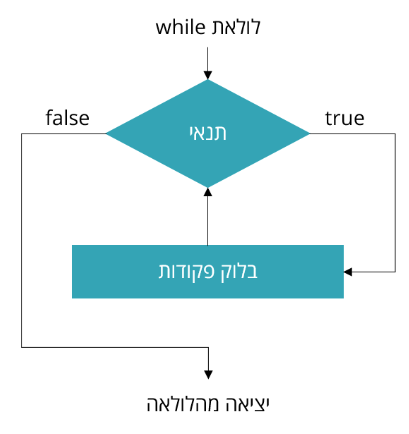

לולאת ה`while` חוזרת על אותן שורות קוד עד שהתנאי בתחילת הלולאה מחזיר False

```python
while expression:
    statement1
    statement2
    …
rest of code…
```

#### ההזחה (indentation) קובעת את גוף האיטרציה

- איטרציה 0:  
    - ביצוע statement1, statement2, …  
- איטרציה 1:  
    - ביצוע statement1, statement2, …  

…

כאשר `expression` הוא `False` ⟶ "קפוץ" לשאר הקוד (כלומר, יציאה מהלולאה)


בהמשך נדגים מצבים שבהם באמת אין מנוס משימוש בלולאות while, כי אין דרך לדעת את מספר האיטרציות מראש. אבל לפני כן נתרגל מה שלמדנו.

השאלות הבאות מתייחסות לפונקציה המסתורית הבאה:


```python
def mystery(st):
    i = 0
    count = 0
    while st[i] != '.':
        if st[i] in 'aeiou':
            count = count + 1
        i = i + 1
    return count
```

In [117]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "מה תחזיר הפונקציה mystery עבור הקריאה: mystery(\\"hello world. nice to meet you\\")?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "3",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "0",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "10",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "29",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  },
  {
    "question": "מה עלול לגרום לאינדקס לא חוקי בקריאות לפונקציה?",
    "type": "many_choice",
    "answers": [
      {
        "answer": ".hello world",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "hello world",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "מחרוזת ריקה",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": ".hello world.",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  }
  
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

תקנו כעת את הפונקציה כך שלעולם לא תיגש לאינדקס לא חוקי, אבל עדיין תבצע את אותה פעולה.

הנחיות:

יש להוסיף תנאי ללולאת ה-while, כלומר היא תיראה מהצורה:
```python
while ________ and st[i] != “.”:
```
על התנאי הנוסף לדאוג לעצירת הלולאה כאשר מגיעים לסוף המחרוזת

In [119]:

def mystery(st):
    ## Modify anything you want in this function:
    i = 0
    count = 0
    while st[i] != '.':
        if st[i] in 'aeiou':
            count = count + 1
        i = i + 1
    return count
    

### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking 'hello. world.'")
ans = mystery('hello. world.')
if ans == 2:
    print("CORRECT: 'hello. world.' has 2 vowels before the first period")
else:
    print("WRONG: 'hello. world.' has 2 vowels before the first period but the code returned", ans)

print("********************")
print("Checking 'hello world. nice to meet you.'")
ans = mystery('hello world. nice to meet you.')
if ans == 3:
    print("CORRECT: 'hello world. nice to meet you.' has 3 vowels before the first period")
else:
    print("WRONG: 'hello world. nice to meet you.' has 3 vowels before the first period but the code returned", ans)

print("********************")
print("Checking ' '")
ans = mystery(' ')
if ans == 0:
    print("CORRECT: The string ' ' has no vowels")
else:
    print("WRONG: The string ' ' has no vowels but the code returned", ans)

print("********************")
print("Checking 'dddda'")
ans = mystery('dddda')
if ans == 1:
    print("CORRECT: 'dddda' has 1 vowel")
else:
    print("WRONG: 'dddda' has 1 vowel but the code returned", ans)

print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Checking 'hello. world.'
CORRECT: 'hello. world.' has 2 vowels before the first period
********************
Checking 'hello world. nice to meet you.'
CORRECT: 'hello world. nice to meet you.' has 3 vowels before the first period
********************
Checking ' '


IndexError: string index out of range

השלימו את הפונקציה `skip_down` אשר מקבלת כקלט מספר num חיובי ומספר skip ומחזירה רשימה המכילה את כל המספרים מ-num ועד אפס בסדר יורד ובקפיצות של skip.

הנחיות:

השתמשו בלולאת `while`. בפרט, אסור להשתמש בלולאת `for` בשאלה זו (שימו לב שהיה אפשר להשתמש בלולאת for על range ואז השאלה היתה קלה הרבה יותר…)

על מנת להחזיר את הרשימה כדאי לאתחל רשימה ריקה `lst=[]`  ולהשתמש במתודה `append` על מנת להוסיף לרשימה איברים, לדוגמא `lst.append(10)`

ניתן להניח כי המספרים `num` ו-`skip` הם חיוביים ושלמים

להלן מספר דוגמאות הרצה:
```python
print(skip_down(10, 3))
>>> [10, 7, 4, 1]
print(skip_down(7, 1))
>>> [7, 6, 5, 4, 3, 2, 1, 0]
```

In [121]:
# Modify this function so it uses for-range loops

def skip_down(num, skip):
    # delete pass and fill in your code below
    pass
    

### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Computing list for skip_down(10, 2)")
ans = skip_down(10, 2)
if ans == [10, 8, 6, 4, 2, 0]:
    print("CORRECT: Very good, skip_down(10, 2) returns [10, 8, 6, 4, 2, 0]")
else:
    print("WRONG: skip_down(10, 2) should return [10, 8, 6, 4, 2, 0] but the code returned", ans)

print("********************")
print("Computing list for skip_down(13, 2)")
ans = skip_down(13, 2)
if ans == [13, 11, 9, 7, 5, 3, 1]:
    print("CORRECT: Very good, skip_down(13, 2) returns [13, 11, 9, 7, 5, 3, 1]")
else:
    print("WRONG: skip_down(13, 2) should return [13, 11, 9, 7, 5, 3, 1] but the code returned", ans)

print("********************")
print("Computing list for skip_down(13, 20)")
ans = skip_down(13, 20)
if ans == [13]:
    print("CORRECT: Very good, skip_down(13, 20) returns [13]")
else:
    print("WRONG: skip_down(13) should return [13] but the code returned", ans)


********************
Starting the test:
********************
Computing list for skip_down(10, 2)
WRONG: skip_down(10, 2) should return [10, 8, 6, 4, 2, 0] but the code returned None
********************
Computing list for skip_down(13, 2)
WRONG: skip_down(13, 2) should return [13, 11, 9, 7, 5, 3, 1] but the code returned None
********************
Computing list for skip_down(13, 20)
WRONG: skip_down(13) should return [13] but the code returned None


In [84]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/yNEgIxdIqso?si=TwFjtQXhA25xyHbH" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [ ]:
def sum_range(start, end):
    s = 0
    for num in range(start, end+1):
        s = s + num
    return s

def sum_range2(start, end):
    s = 0
    num = start
    while num <= end:
        s = s+ num
        num = num + 1
    return s

### תרגול

בחלונית הקוד שלפניכם מופיעה הפונקציה avg המחשבת ממוצע ברשימת מספרים. ראינו את הפונקציה הזו בתרגיל ביחידה הקודמת. בפונקציה נעשה שימוש בלולאת for.

שנו את הפונקציה avg כך שתשתמש בלולאת while (במקום לולאת ה-for). שימו לב שגישה לאיברים של רשימה (או מחרוזת) באמצעות לולאת while מתאפשרת רק באמצעות גישה לאינדקסים של הרשימה ושימוש בסוגריים מרובעים [].

לאחר שסיימתם, הריצו את הקוד ובדקו האם הפונקציה עובדת כמצופה.

In [93]:
# Modify this function so it uses while loops

def avg(L):
    s = 0
    for num in L:
         s = s + num
    return s/len(L)



### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Computing the average of [1, 2, 3, 4, 5]")
ans = avg([1, 2, 3, 4, 5])
if ans == 3.0:
    print("CORRECT: Very good, the average of [1, 2, 3, 4, 5] is 3.0")
else:
    print("WRONG: The average of [1, 2, 3, 4, 5] is 3.0 but the code returned", ans)

print("********************")
print("Computing the average of [10, 10, 10, 100]")
ans = avg([10, 10, 10, 100])
if ans == 32.5:
    print("CORRECT: Very good, the average of [10, 10, 10, 100] is 32.5")
else:
    print("WRONG: The average of [10, 10, 10, 100] is 32.5 but the code returned", ans)

********************
Starting the test:
********************
Computing the average of [1, 2, 3, 4, 5]
CORRECT: Very good, the average of [1, 2, 3, 4, 5] is 3.0
********************
Computing the average of [10, 10, 10, 100]
CORRECT: Very good, the average of [10, 10, 10, 100] is 32.5


In [135]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "במהלך ריצת התוכנית, כמה פעמים נכנסים לתוך הלולאה (כלומר, מבצעים את הפעולה שבשורה 3)?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "1",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "2",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "3",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "4",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  },
  {
    "question": "מה ערכו של num בסוף ריצת התוכנית (לאחר ההדפסה בשורה 4)?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "4",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "8",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "16",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "256",
        "correct": true,
        "feedback": "נכון!"
      }
    ]
  },
  {
    "question": "האם התשובה לשאלה 1 הייתה משתנה אם היינו משנים את שורה 2 ל: while num < 30?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "כן",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "לא",
        "correct": true,
        "feedback": "נכון!"
      }
    ]
  },
  {
    "question": "ריק ומורטי הם סטודנטים בקורס. כשהסתכלו על קטע הקוד המקורי (ללא השינוי בסעיף לעיל), ריק טען שאיתחול ערך המשתנה num ל-1 בשורה 1 לא פוגע משנה של num בסיום ריצת התוכנית. מורטי טען כי ריק טועה. מי מבין השניים צודק?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "ריק",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "מורטי",
        "correct": true,
        "feedback": "נכון!"
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### לולאות אינסופיות – ראו הוזהרתם!

לולאות while מציבות לפתחנו סיכון שעלינו להיות מודעים אליו. בעוד שלולאות for נעצרות כאשר הגענו לסוף סדרת הערכים בiterable שהצבנו בfor, בלולאות while אנחנו אחראים לכך שבמוקדם או במאוחר התנאי כבר לא יתקיים עוד והלולאה תעצור. לולאה אינסופית תיווצר כאשר נשכח לעדכן את המשתנה הקשור לתנאי הלולאה, או שנגדיר תנאי שלעולם
לא ישוערך ל- False. למשל, בדוגמה הבאה, מה היה קורה אילו בטעות היינו משמיטים את השורה `num = num+1`, כלומר, שוכחים להגדיל את num ב-1 בכל איטרציה של הלולאה? 
```python
def sum_range2(start, end):
    s = 0
    num = start
    while num <= end:
        s = s+num
        num = num+1 ##Accidently this line was dropped
    return s
```

טעות זו מסתברת כבעלת השלכות דרמטיות. מה יקרה למשל אם נריץ כעת:
```python
print(sum_range2(1, 10))
```
הלולאה תמשיך, תאורטית לפחות, לרוץ לנצח! הרי הערך של num לנצח יהיה 1, ולכן התנאי num<end יתקיים תמיד. בסרטון הבא נדגים את זה קורה בפועל.

להלן מספר קטעי קוד. קבע עבור כל אחד מהם האם הוא יוצר לולאה אינסופית.

```python
# קטע 1
for i in range(10, 20, -1):
    print(i)

# קטע 2
i = 0
while i < 100:
    i = i + 10
    print(i)

# קטע 3
i = 20
while i > 0:
    i = i - 1
    if i < 10:
        i = 20
    print(i)

# קטע 4
for i in range(1, 10):
    print(i)

# קטע 5
i = 0
while i < 100:
    i = i * 10
    print(i)


In [163]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "האם קטע 1 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 2 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 3 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": true, "feedback": "נכון!" },
      { "answer": "לא", "correct": false, "feedback": "לא נכון" }
    ]
  },
  {
    "question": "האם קטע 4 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": false, "feedback": "לא נכון" },
      { "answer": "לא", "correct": true, "feedback": "נכון!" }
    ]
  },
  {
    "question": "האם קטע 5 יוצר לולאה אינסופית?",
    "type": "many_choice",
    "answers": [
      { "answer": "כן", "correct": true, "feedback": "נכון!" },
      { "answer": "לא", "correct": false, "feedback": "לא נכון" }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [136]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/eUuxmC5TEjg?si=QcZbcNxvbatWzslJ" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### דוגמה לשימוש בלולאת while – הטלת קוביה

כל הדוגמאות שראיתם עד כה לא באמת הצריכו לולאות while. אבל הן היו חשובות כדי להבין את התחביר של לולאות מסוג זה. הדוגמה שניראה כעת שונה – בדוגמה זו חייבים להשתמש בלולאות while. לאחר מכן נראה בסרטון עוד דוגמה נחמדה להשערה מתמטית מפורסמת.
מתי בפעם האחרונה הטלתם קוביה? הטלת קוביה או מטבע היא שיטה פשוטה לבחור תוצאה מסויימת באופן אקראי. למשל, אם אתם צריכים להחליט מי יפנה את האשפה, את או אחיך הקטן, אפשר להטיל מטבע כאשר כל צד במטבע מייצג תוצאה אפשרית. אם המטבע הוגן (הסיכוי שלו ליפול על כל צד זהה), וההטלה הוגנת (לא מנסים לגרום למטבע ליפול על איזשהו צד במכוון), התוצאה תהיה אקראית. אי אפשר לדעת מראש על איזה צד ייפול המטבע, ואם נטיל אותו פעמים רבות, נצפה שהוא ייפול על כל אחד מהצדדים שלו מספר דומה של פעמים (אם כי לא מובטח, ואף לא סביר, שהמספרים יהיו ממש זהים). הטלת קוביה עם 6 פאות דומה בכך שגם היא מספקת תוצאה אקראית, אלא שכאן יש 6 תוצאות אפשריות ולא 2. 

איך זה קשור לענייננו – לולאות while? נניח שאנחנו רוצים להטיל קוביה מספר פעמים, ולספור את כמות ההטלות עד שמתקבלת התוצאה 6. בהנחה שהקוביה הוגנת במובן שהוזכר קודם, אין לנו דרך לדעת מראש כמה הטלות כאלו יידרשו. מעבר לכך, בכל "ניסוי" כזה מספר ההטלות עשוי בהחלט להשתנות. פעם אחת נקבל 6 מייד בהטלה הראשונה, ופעם רק בהטלה העשירית. ייתכן גם, אם כי מאוד לא סביר, שנקבל 6 רק אחרי 1000 הטלות. אבל הנקודה היא שמאחר שמספר האיטרציות כאן לא יכול להיות ידוע מראש, אם נרצה לכתוב תוכנית בפייתון שתדמה הטלת קוביה, נצטרך להשתמש בלולאות. **בסרטון הבא נכתוב יחד תכנית זו.**

In [150]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/qhtRPba6BjE?si=1rnoInDsS36z6do9" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [151]:
import random

def count_rolls_until_6():
    res = random.choice([1, 2, 3, 4, 5, 6])
    print(res)
    count_rolls = 1
    while res != 6:
        res = random.choice([1, 2, 3, 4, 5, 6])
        print(res)
        count_rolls = count_rolls + 1

    return count_rolls


rolls = count_rolls_until_6()
print(rolls, "rolls were needed to get 6 in a fair dice experiment")

3
6
2 rolls were needed to get 6 in a fair dice experiment


### תרגול

בחלונית הקוד שלפניכם מופיעה הפונקציה count_rolls_until_6 אותה הצגנו בסרטון, אך בשינוי קל - הפעם הפונקציה מקבלת כקלט פרמטר אחד בשם n (שאנו נניח כי הוא מספר שלם חיובי).

עליכם לשנות את הפונקציה כך שהיא תחזיר את מספר ההטלות שנדרשו עד לקבלת המספר 6 n פעמים (למשל: עבור n = 3 הפונקציה תחזיר כמה הטלות נדרשו בהרצה הנוכחית עד שקיבלנו 3 פעמים את המספר 6).

הנחיות:

המבנה הכללי של הפונקציה נשאר דומה - יש לבצע "הטלה" ראשונה של הקוביה, ולאחר מכן, בתוך לולאת while, לבצע הגרלות נוספות לפי הצורך. אז מה כן שונה? בעיקר התנאי של הלולאה - עליכם להוסיף מונה נוסף (תנו לו שם כרצונכם) שיהיה אחראי על ספירת ההטלות בהן קיבלנו 6 (שימו לב - זהו מונה שונה מ-count_rolls שסופר את מספר ההטלות הכולל, ואת ערכו יש להחזיר בסוף הפונקציה). חישבו היכן וכיצד לאתחל מונה זה. הלולאה תרוץ כל עוד ערכו של מונה זה קטן מ-n. ומה קורה בתוך הלולאה? כמו קודם, מגרילים מספר חדש. אם התוצאה היא 6 - הגדילו את ערכו של המונה החדש ב-1. ובכל מקרה - בין אם התוצאה היא 6 ובין אם לא - הגדילו את המונה count_rolls. לאחר שיוצאים מהלולאה, כלומר, כאשר קיבלנו 6 n פעמים, מחזירים את מספר ההטלות הכולל.

לאחר שסיימתם לכתוב את הקוד, שנו את המשתנה n שמופיע מתחת לפונקציה למספר חיובי ושלם כרצונכם (זהו הקלט של הפונקציה), הריצו את הקוד, ובדקו לפי תוצאות ההטלות (המודפסות למסך) האם הקוד שלכם עובד (אין צורך לכתוב את הקריאה לפונקציה, עשינו זאת עבורכם).

דוגמת הרצה:

עבור n=2, זהו פלט אפשרי עבור פתרון נכון של התרגיל (ההטלות בהן התקבלה התוצאה 6 מודגשות):

In [156]:
import random

# Modify this function:
def count_rolls_until_6(n):
    res = random.choice([1, 2, 3, 4, 5, 6])
    print(res)
    count_rolls = 1
    while res != 6:
        res = random.choice([1, 2, 3, 4, 5, 6])
        print(res)
        count_rolls = count_rolls + 1

    return count_rolls


n = 1
rolls = count_rolls_until_6(n)
print(rolls, "rolls were needed to get", n,"times 6 in a fair dice experiment")

3
5
2
5
3
3
6
7 rolls were needed to get 1 times 6 in a fair dice experiment


בחלונית הקוד להלן מופיעה כותרת הפונקציה birthday המקבלת כקלט תאריך לידה המורכב משני פרמטרים - day ו-month - יום וחודש. אנו נניח כי day הוא מספר שלם בין 1 ל-31 ו-month מספר שלם בין 1 ל-12:

In [157]:
import random

def count_rolls_until_6():
    res = random.choice([1, 2, 3, 4, 5, 6])
    #print(res)
    count_rolls = 1
    while res != 6:
        res = random.choice([1, 2, 3, 4, 5, 6])
        #print(res)
        count_rolls = count_rolls + 1

    return count_rolls

days = [i for i in range(1,32)]
months = [i for i in range(1,13)]

def birthday(day, month):
    # Write your solution here
    pass
    
    
    
day = 1
month = 1
print("It took", birthday(day, month), "trials to draw this birthday:", day, ".", month)

It took None trials to draw this birthday: 1 . 1


עליכם לממש את הפונקציה birthday כך שהיא תגריל תאריכי לידה שוב ושוב עד שיתקבל התאריך שהתקבל כקלט, ולבסוף תחזיר את מספר ההגרלות שנדרש.

#### הנחיות:

כפי שודאי שמתם לב, זהו תרגיל דומה למה שראינו בסרטון, אלא שכאן נדרשים שני תנאים - צריך שתהיה התאמה בין התאריך שהוגרל לתאריך הקלט גם ביום וגם בחודש. במילים אחרות - כל עוד היום שהוגרל שונה מיום הקלט או החודש שהוגרל שונה מחודש הקלט - נמשיך להגריל תאריכים. לצורך כך ניזכר במילה or בפייתון בה כבר נתקלנו כשלמדנו על ביטויי תנאי מורכבים. נסביר שוב בקצרה איך היא עובדת באמצעות שורת הקוד הבאה:
```python
while condition1 or condition2:
```
כאשר condition1 ו-condition2 הם שמות תנאים בוליאניים כלליים (כלומר, ביטויים שערכם הוא True או False, כגון 3 > 5, 6 =! 7 וכו'). אנו מתייחסים לביטוי condition1 or condition2   כתנאי בוליאני בפני עצמו, התלוי בשני החלקים הללו - התנאי משוערך ל-True כאשר לפחות אחד מהתנאים משוערך ל-True, ומנגד, משוערך ל-False אך ורק אם שני התנאים הללו משוערכים ל-False. למשל, השורה:
```python
while 1 != 3 or 3 > 5:
```
שקולה לשורה:
```python
while True:
```
שכן התנאי הראשון משוערך ל-True (זה היה נכון גם אם דווקא התנאי השני היה זה שמשוערך ל-True, ובפרט - זה נכון גם כאשר שניהם משוערכים ל-True).

לעומת זאת, השורה:
```python
while 1 == 3 or 3 > 5:
```
שקולה לשורה:
```python
while False:
```
מכיוון שכאן שני התנאים משוערכים ל-False.

עד כאן התזכורת לגבי המילה or וכיצד משתמשים בה. אנו ממליצים לכם להיעזר ב-or לפתרון התרגיל.

בנוסף, אתחלנו עבורכם שני משתנים בשמות days ו-months שערכיהם הן רשימות עם המספרים בין 1 ל-31 ובין 1 ל-12 בהתאמה (אנו מניחים כאן הנחה מקלה - שבכל החודשים יש 31 ימים, ולכן ב"שנה" שלנו קיימים תאריכים שלא קיימים במציאות כמו 30.2 וכו'). **השתמשו במשתנים אלו כדי להגריל יום וחודש**.

ניתן להוסיף הדפסות עזר (בדומה לאלו שנמצאות בהערה בפונקציה count_rolls_until_6) כדי לעקוב אחר התאריכים המוגרלים ולוודא כי אתם יוצאים מהלולאה רק לאחר הגרלת תאריך הקלט.

לבסוף, לאחר שסיימתם לכתוב את הפונקציה, עדכנו את המשתנים day ו-month שבתחתית הקוד ליום ולחודש הלידה שלכם, הריצו את הקוד ובדקו את עצמכם.

**נקודה למחשבה**: לכמה הגרלות תזדקקו **בממוצע** עד שתגרילו את תאריך הקלט? רמז: כדי לקבל מספר מסוים (למשל: 3) בקובייה הוגנת (בעלת 6 פאות), דרושות בממוצע 6 הטלות.

### סיכום ביניים – לולאות `for` לעומת לולאות `while`

ביחידה הזו הכרנו את הסוג השני של לולאות בשפת פייתון – לולאות while. בואו נסכם מה ראינו עד עכשיו תוך השוואה בין שני סוגי הלולאות. 

- לולאות `for`: משמשות לביצוע קטע קוד באופן חזרתי, מספר ידוע מראש של פעמים. לולאות אלו שימושיות למשל לצורך מעבר על תוי מחרוזת (str), אברי רשימה (list), או מספרים בטווח (range). בכל המקרים האלו אכן מספר האיטרציות ידוע מראש. כמו כן, אם פשוט רוצים לבצע פעולה כלשהי מספר פעמים, ניתן לשים את הפעולה בתוך לולאת for מהצורה:
```python
for i in range(n):
       פעולה
```
כאשר n הוא מספר הפעמים שרוצים לבצע את הפעולה.

- לולאות `while`: משמשות לביצוע קטע קוד באופן חזרתי כל עוד מתקיים תנאי מסויים. לולאות אלו הכרחיות כאשר לא ידוע לנו מראש מספר האיטרציות, כפי שראינו בדוגמת הטלת הקוביה עד להשגת התוצאה 6. יחד עם זאת, אפשר כמובן להשתמש בלולאות while גם כאשר ידוע מראש מספר האיטרציות. תמיד אפשר לכתוב למשל לולאה כזו:
```python
i=0
while i<n:
       פעולה	
        i = i+1
```
לולאה זו למעשה שקולה לולאת ה-`for` שלעיל, וגם היא מבצעת פעולה מסויימת בדיוק n פעמים.

לולאות `while` בפייתון דורשות זהירות מסויימת, כי המתכנת אחראי להגדרת הלולאה באופן תקין, שתעצור אחרי מספר סופי של איטרציות (כלומר שלא תיכנס ללולאה אינסופית). הטעות הנפוצה בעניין זה היא לשכוח לקדם את הלולאה אל עבר סיומה. בדוגמה הנ"ל זוהי הפקודה `i = i+1` שדואגת שאכן הלולאה תסתיים, כי בכל פעם i  מתקרב ל-n (בהנחה ש-n לא מספר שלילי!). אבל לולאה אינסופית יכולה להיגרם גם מטעות בתנאי הלולאה או מאיתחול לא נכון של משתנה הלולאה (i בדוגמה הנ"ל).

ביחידה הבאה נראה עוד שתי דוגמאות מעניינות לשימוש בלולאות (דוגמה אחת לכל סוג לולאה), ונקדיש עוד קצת זמן לתרגול הנושא החשוב הזה.

## פתרון בעיות באמצעות לולאות

### זיהוי פולינדרום

את השפה העברית אנחנו כותבים וקוראים בד"כ מימין לשמאל. כך גם בערבית. לעומת זאת בשפות כמו אנגלית, רוסית, צרפתית וגם באמהרית כותבים וקוראים משמאל לימין. בכל השפות האלו ובאחרות ישנן מילים שאפשר לקרוא אותן בשני הכיוונים באותו אופן. למשל, המילה 'אמא' בעברית, או המילה radar באנגלית. מילים כאלו נקראות "פלינדרום". 

כעת ננסח בצורה מעט יותר פורמלית את בעית הפולינדרום. הקלט לבעיה שלנו הוא מחרוזת. אם המחרוזת ניתנת לקריאה בשני הכיוונים באופן זהה הפלט יהיה True.

In [168]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "סמנו מבין הביטויים הבאים פלינדרומים מושלמים בלבד.",
    "type": "many_choice",
    "answers": [
      {
        "answer": "azaz",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "qwerty",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "sator arepo tenet opera rotas",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "racecar",
        "correct": true,
        "feedback": "נכון!"
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

אז איך ייראה אלגוריתם לפתרון בעיית זיהוי פלינדרום?

הנה אלגוריתם אפשרי: נתחיל משני קצוות המחרוזת ונשווה את התווים המתאימים. אם הם שונים, נוכל כבר ברגע זה להכריז שהמחרוזת היא **לא פלינדרום**. אם הם שווים, נזוז צעד אחד פנימה משני צדי המחרוזת ונבדוק אם שני התווים הבאים שווים.

למשל, “RADAT” תתגלה כמחרוזת שאיננה פלינדרום כבר בבדיקת זוג התווים הראשון שבקצוות. 

לעומת זאת אם התווים שבקצוות שווים, לא נוכל לדעת דבר בשלב זה. המחרוזת יכולה להיות פלינדרום ויכולה שלא להיות, צריך להמשיך לבדוק. לכן, נזוז צעד אחד פנימה משני קצוות המחרוזת ונבדוק אם שני התווים הבאים שווים. ושוב: אם הם לא שווים, נוכל לסיים ולהכריז שהמחרוזת היא לא פלינדרום. 

אחרת נצטרך להמשיך, וחוזר חלילה.

מתי נוכל לקבוע בוודאות שמצאנו פלינדרום? התהליך הזה יימשך כל עוד התו הימני שמשווים אכן נמצא מימין לתו השמאלי שמשווים. בפעם הראשונה שתנאי זה לא מתקיים, נוכל להכריז שהמחרוזת הנתונה היא אכן פלינדרום. שימו לב שלא צריך להמשיך לבצע את הבדיקה אחרי שמתקיים התנאי, כי ברגע שנעבור את האמצע נתחיל לבצע השוואות שכבר ביצענו קודם. 

רגע, **אמרנו כל עוד?? אמרנו לולאת `while`!**

הרבה פעמים הדרך שבה אנחנו מנסחים לעצמנו את האלגוריתם במילים מעידה על סוג הלולאה שאותה כדאי לבחור. במקרה הזה טבעי להשתמש בלולאות while, אם כי היה אפשר גם להשתמש בלולאות for.

לפני שנקפוץ לממש את האלגוריתם הזה בפייתון, בואו נכתוב אותו בפסאודו קוד. נשתמש בשני משתנים שיכילו אינדקסים במחרוזת. הם יאותחלו לקצוות, ויזוזו פנימה בכל איטרציה. 

**זיהוי פלינדרום (קלט: המחרוזת st)**

1. אתחל l=0, r=len(st)-1
2. כל עוד l<r:  
    2.1 אם st[l] לא שווה ל- st[r]:  
        2.1.1. החזר False וסיים
    2.2 הגדל את l ב- 1 והקטן את r ב- 1
3. החזר True

בהתחלה נגדיר שני משתנים עם השמות l (left) ו-r (right). נאתחל את l לאינדקס השמאלי ביותר של המחרוזת, כלומר 0, ואת r לימני ביותר, כלומר אורך המחרוזת פחות 1 (פחות 1, כי מתחילים ב-0). ואז נריץ בלולאה כל עוד `l<r`, ונשווה את תווי המחרוזת באינדקסים l ו-r. אם הם שונים אנחנו יודעים בדיוק מה לעשות – לסיים את ריצת האלגוריתם ולהחזיר False. אם הם שווים, צריך להמשיך בלולאה, אבל לא לפני שנזיז את l מקום אחד ימינה, כלומר נגדיל אותו ב-1, ואת r נזיז שמאלה, כלומר נקטין אותו ב-1. משורה 2.2 חוזרים לבדוק את התנאי שבשורה 2 פעם נוספת. כך ממשיך התהליך עד שקורה אחד משניים: או שמתישהו מגלים תווים מתאימים ששונים זה מזה, ומחזירים False, או שהלולאה מסתיימת כי האינדקס l כבר לא קטן מהאינדקס r, כלומר או שהמשתנים l ו-r נפגשו, או שהם חלפו זה על פני זה. אחד מהשניים בטוח יקרה בשלב מוקדם או מאוחר. אם הלולאה הסתיימה מהסיבה השניה, אפשר סוף סוף להחזיר True.

In [172]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "type": "numeric",
    "question": "נניח כי אנו מריצים את האלגוריתם שבודק לעיל על המילה 'racekar', כמה איטרציות של בדיקה נבצע עד שנחזיר False (כולל הבדיקה שבסופה נחזיר False)?",
    "answers": [
      {
        "type": "value",
        "value": 3,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "לא נכון"
      }
    ]
  },
  {
    "type": "short_answer",
    "question": "עיצרו וחשבו: עבור אילו אורכים של מחרוזות המשתנים i ו-j ייפגשו באמצע המחרוזת, ועבור אילו אורכים של מחרוזות הם יחלפו זה על פני זה באמצע המחרוזת?",
    "answers": [
      {
        "answer": "הצג תשובה",
        "correct": true,
        "feedback": "התשובה תלויה בהסבר – זו שאלה פתוחה עם דיון עקרוני."
      }
    ]
  },
  {
    "type": "many_choice",
    "question": "מה מספר האיטרציות המקסימלי שיבצע האלגוריתם שלנו, עבור מחרוזת באורך n? כלומר כמה פעמים לכל היותר ניכנס לגוף הלולאה?",
    "answers": [
      {
        "answer": "מחצית מאורך המחרוזת (n/2, מעוגל כלפי מטה)",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "מחצית המחרוזת ועוד 1",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "תלוי אם n זוגי או אי-זוגי",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "מחצית מאורך המחרוזת פחות 1 (n//2 - 1)",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

בתרגיל זה נכתוב שתי פונקציות - אחת לזיהוי פלינדרום מושלם ואחת לזיהוי פלינדרום "כללי".

בואו נתחיל מזיהוי פלינדרום מושלם - הפונקציה שנכתוב נקראת is_palindrome ומקבלת כקלט מחרוזת string, להלן תזכורת לפסאודו-קוד שתארנו ביחידה הקודמת:

זיהוי פלינדרום (קלט: מחרוזת st)

1. אתחל l=0, r=len(st)-1  
2. כל עוד l<r:  
    2.1 אם st[l] לא שווה ל- st[r]:  
        2.1.1 החזר False וסיים
    2.2 הגדל את l ב- 1 והקטן את r ב- 1  
4. החזר True  

השלימו את הקוד לפונקציה בחלונית הקודבורד. הקפידו להשתמש בלולאת while ולא בלולאת for. כמו כן, הריצו את הפונקציה שלכם על דוגמאות ההרצה הבאות כדי לוודא שהיא עובדת נכון (לפחות עבור מקרים אלו).

דוגמאות הרצה:
```python
print(is_palindrome('anna'))
>>> True
print(is_palindrome('radar radar'))
>>> True
print(is_palindrome('Anna'))
>>> False
```

In [174]:

def is_palindrome(st):
    # delete pass and fill in your code below
    pass

        
### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking if 'anna' is a perfect palindrome")
ans = is_palindrome('anna')
if ans == True:
    print("CORRECT: 'anna' is a perfect palindrome")
else:
    print("WRONG: 'anna' is a perfect palindrome but the code returned", ans)
    
print("********************")
print("Checking if 'A man, a plan, a canal, Panama' is a perfect palindrome")
ans = is_palindrome('A man, a plan, a canal, Panama')
if ans == False:
    print("CORRECT: 'A man, a plan, a canal, Panama' is not a perfect palindrome")
else:
    print("WRONG: 'A man, a plan, a canal, Panama' is not a perfect palindrome but the code returned", ans)
    
print("********************")
print("Checking if 'a nN.a' is a perfect palindrome")
ans = is_palindrome('a nN.a')
if ans == False:
    print("CORRECT: 'a nN.a' is not a perfect palindrome")
else:
    print("WRONG: 'a nN.a' is not a perfect palindrome but the code returned", ans)    

********************
Starting the test:
********************
Checking if 'anna' is a perfect palindrome
WRONG: 'anna' is a perfect palindrome but the code returned None
********************
Checking if 'A man, a plan, a canal, Panama' is a perfect palindrome
WRONG: 'A man, a plan, a canal, Panama' is not a perfect palindrome but the code returned None
********************
Checking if 'a nN.a' is a perfect palindrome
WRONG: 'a nN.a' is not a perfect palindrome but the code returned None


In [158]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/iDf3Fi3sTLg?si=lps1Mz5y4LWnWZ7h" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [179]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "type": "many_choice",
    "question": "מהו הקלט ומהו הפלט בבעיה שראינו זו עתה?",
    "answers": [
      {
        "answer": "קלט - כל הגורמים של המספר. פלט - מספר שלם חיובי",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "קלט - הגורם הקטן ביותר הגדול מ-1 של המספר. פלט - מספר שלם חיובי",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "קלט - מספר שלם חיובי. פלט - הגורם הקטן ביותר הגדול מ-1 של המספר",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "קלט - מספר שלם חיובי. פלט - כל הגורמים של המספר",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  },
  {
    "type": "many_choice",
    "question": "עבור איזה מהקלטים הבאים האלגוריתם יבצע איטרציה אחת בלבד ויסיים?",
    "answers": [
      {
        "answer": "15",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "10",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "11",
        "correct": false,
        "feedback": "לא נכון"

      },
      {
        "answer": "9",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### מציאת הגורם הראשוני המינימלי - תרגול פייתון

בתרגול זה אתם מתבקשים לכתוב תוכנית למציאת הגורם הראשוני המינימלי של מספר שלם. הנה תזכורת לפסאודו-קוד של התוכנית שהוצג ביחידה על מספרים ראשוניים:

קלט: מספר שלם חיובי n

1. לכל k בין 2 לבין n:  
    1.1. אם n מתחלק ב-k ללא שארית:  
        1.1.1. החזר את k וסיים (k הוא הגורם הקטן ביותר של n)  

בחלונית הקודבורד שלפניכם תמצאו את כותרת הפונקציה `smallest_factor(n)`. הפונקציה מקבלת כקלט מספר שלם חיובי n. עליה להחזיר את k, המספר השלם הקטן ביותר בין 2 ו-n אשר מחלק את n ללא שארית.

זכרו - את השאלה האם n מתחלק ב-k ללא שארית ניתן לנסח ב"פייתונית" על ידי מציאת שארית החלוקה באמצעות **במודולו / `%`**:
```python
n % k == 0
```
השוואה זו תחזיר True כאשר n מתחלק ב-k ללא שארית, ו-False אחרת.

In [180]:

def smallest_factor(n):
    # delete pass and fill in your code below
    pass


### TESTS ###

print("********************")
print("Starting the test:")
    
print("********************")
print("Checking the smallest factor of 24")
ans = smallest_factor(24)
if ans == 2:
    print("CORRECT: 2 is the smallest factor of 24")
else:
    print("WRONG: 2 is the smallest factor of 24 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 33")
ans = smallest_factor(33)
if ans == 3:
    print("CORRECT: 3 is the smallest factor of 33")
else:
    print("WRONG: 3 is the smallest factor of 33 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 17")
ans = smallest_factor(17)
if ans == 17:
    print("CORRECT: 17 is the smallest factor of 17")
else:
    print("WRONG: 17 is the smallest factor of 17 but the code returned", ans)

print("********************")
print("Checking the smallest factor of 3476957")
ans = smallest_factor(3476957)
if ans == 11:
    print("CORRECT: 11 is the smallest factor of 3476957")
else:
    print("WRONG: 11 is the smallest factor of 3476957 but the code returned", ans)
    
print("********************")
print("Tests concluded, add more tests of your own below!")
print("********************")


********************
Starting the test:
********************
Checking the smallest factor of 24
WRONG: 2 is the smallest factor of 24 but the code returned None
********************
Checking the smallest factor of 33
WRONG: 3 is the smallest factor of 33 but the code returned None
********************
Checking the smallest factor of 17
WRONG: 17 is the smallest factor of 17 but the code returned None
********************
Checking the smallest factor of 3476957
WRONG: 11 is the smallest factor of 3476957 but the code returned None
********************
Tests concluded, add more tests of your own below!
********************


### יעילות האלגוריתם למציאת הגורם הראשוני המינימלי

נחזור לשאלת היעילות של האלגוריתם למציאת הגורם הראשוני המינימלי של מספר שלם. נתחיל בהערכת מספר האיטרציות הדרושות לאלגוריתם שראינו כדי למצוא גורם ראשוני מינימלי.

**פסאודו קוד: מציאת הגורם המינימלי**  
קלט: מספר שלם חיובי n

1. לכל k בין 2 לבין n:  
1.1 אם n מתחלק ב- k ללא שארית:  
1.1.1 החזר את k וסיים  
(k הוא הגורם הקטן ביותר של n)

**מהו מספר האיטרציות המקסימלי האפשרי של האלגוריתם שבנינו למציאת הגורם הראשוני הקטן ביותר של מספר נתון?**

עבור מספר נתון n שאת ראשוניותו רוצים לבדוק, מספר האיטרציות הוא כמספר הערכים k בין 2 לבין n, כלומר n-1 איטרציות. כמובן, אם גילינו בשלב מוקדם יותר ש-n מתחלק ללא שארית בערך כלשהו של k, מספר האיטרציות בפועל יהיה קטן יותר.

אפשר ליעל את האלגוריתם שלנו ולעצור את ריצתו אחרי הרבה פחות מ-n-1 איטרציות. למעשה, $\sqrt(n)$ איטרציות (קרי: שורש ריבועי של n) מספיקות. 

איך ייתכן שאפשר לוותר על כל כך הרבה שלבי בדיקה מבלי להסתכן שנפספס את הגורם המינימלי?

הסתכלו למשל על המספר 100. שורש ריבועי של 100 זה המספר שכשנעלה אותו בריבוע נקבל 100, כלומר 10. יש שמונה מספרים בין 2 ל-100 (לא כולל) שמחלקים את 100. נרשום את כולם:

2, 4, 5, 10, 20, 25, 50

עכשיו, שימו לב לעובדה הבאה: ניתן להפריד את המחלקים של 100 לזוגות: לכל מחלק של 100 שגדול או שווה ל-10 אפשר להצמיד את אחד מהמחלקים שקטן או שווה 10, כך שמכפלת השניים תהיה שווה 100 

| תוצר הכפלה | מחלק קטן או שווה ל-10 | מחלק גדול או שווה ל-10 |
|------------|------------------------|--------------------------|
|            | 2                      | 50                       |
|            | 4                      | 25                       |
|            | 5                      | 20                       |
| 100        | 10                     | 10                       |

מה כל זה אומר? זה אומר שלא יכול להיות שכל המחלקים של 100 גדולים משורשו הריבועי. במילים אחרות, חייב להיות גורם ראשוני של מאה שקטן או שווה לשורשו הריבועי. כי לכל אחד מהמחלקים של 100 שגדולים משורשו הריבועי יש "בן זוג" שקטן משורשו הריבועי. הדבר נכון לא רק למספר 100, אלא לכל מספר שלם חיובי! המסקנה היא שאם האלגוריתם שלנו ביצע לפחות $\sqrt(n)$ איטרציות ולא החזיר מחלק, k, אפשר לעצור ולהחזיר n. להריץ $\sqrt(n)$ איטרציות זה הרבה פחות מלהריץ n-1 איטרציות!
שימו לב כי ישנם מקרים בהם n−−√ איטרציות הן באמת מספר האיטרציות המינימלי הדרוש למציאת מחלק. למשל, עבור n=25, המחלק הקטן ביותר של 25 הוא 5, שהוא שורשו הריבועי. האם אתם יכולים לחשוב על ערכי n אחרים עבורם נצטרך $\sqrt(n)$ איטרציות? מה משותף להם?

הסתכלו על האיור הבא:

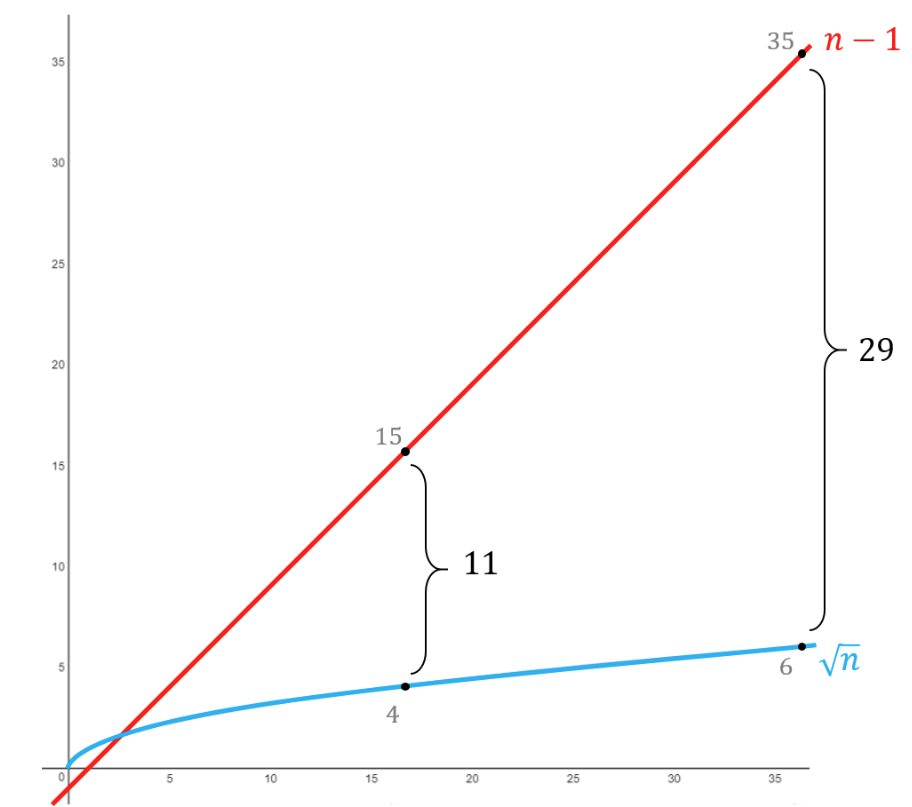

הקו האדום מייצג את הערך של הביטוי n−1 עבור ערכים שונים של n. למשל, עבור n = 16, הערך של ביטוי זה, הוא 15. הקו הכחול מייצג את הביטוי $\sqrt(n)$, ועבור n=16, ערך הביטוי הוא 4. ההפרש בין שני ערכים אלו הוא 11. לעומת זאת, עבור n=36, למשל, ההפרש גדל עוד יותר, והוא עומד על 29. ההבדל נעשה דרמטי יותר ככל ש-n הוא מספר גדול יותר. חישבו למשל על הערכים שהיו מתקבלים עבור n=10**6. **איור זה ממחיש שהעובדה שהצלחנו לצמצם את מספר האיטרציות מ-n−1 ל-$\sqrt(n)$ היא שיפור משמעותי ביעילות האלגוריתם.** 

לעומת זאת, עבור מספרים גדולים שמכילים כמה מאות ספרות עשרוניות, לאלגוריתם שלנו ידרש זמן רב מדיי להשלמתו (וגם לאלגוריתם המשופר שתחת החדשות הטובות). הכוונה היא לא לחמש דקות או שעתיים, אלא לסדר גודל של מליארדי שנים! יש אמנם אלגוריתמים אחרים, מסובכים, מתוחכמים, יעילים יותר, למציאת גורמים של מספר. אבל גם אלה אינם יכולים למצוא ביעילות גורמים של מספרים גדולים.

### סיכום פתרון בעיות פולינדום ומציאת מספרים ראשוניים
בואו נסכם את מה שראינו ביחידה הזו. הדגמנו שימוש בלולאת while כדי לזהות אם מחרוזת היא פלינדרום, ובלולאת for כדי למצוא גורם ראשוני מינימלי של מספר שלם חיובי. בשני המקרים הדגמנו מהלך שלם של פתרון בעיה חישובית – החל בהגדרת הבעיה, דרך ניסוח האלגוריתם במונחים של פסאודו-קוד, ועד מימוש האלגוריתם בפייתון. בנוסף, דנו ביעילותם של אלגוריתמים, נושא שאליו נחזור שוב בהמשך השיעור, וגם בשיעורים הבאים. כאמור, זה נושא מרכזי ביותר במדעי המחשב.

### לולאות מקוננות

בדומה למשפטי תנאי מקוננים אותם פגשנו, כאן מדובר על לולאה שנמצאת בתוך לולאה אחרת. אם יש שתי לולאות כאלו אחת בתוך השנייה, אז לולאה אחת היא לולאה חיצונית וזו שבתוכה תיקרא לולאה פנימית.

מה שמיוחד במצב הזה הוא, שהלולאה הפנימית תתבצע בעצמה פעמים רבות. כלומר בכל איטרציה של הלולאה החיצונית, הלולאה הפנימית תתחיל להתבצע מחדש. 

נתחיל בשאלת הכנה.

מה מדפיס הקוד הבא:
```python
a = 0
b = 5
for i in range(5):
    a = a + 1
b = b - 1  
print(a,b)
```

In [187]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "type": "many_choice",
    "question": "מה מדפיס הקוד הבא?",
    "answers": [
      {
        "answer": "5 0",
        "correct": false,
        "feedback": "לא נכון"

      },
      {
        "answer": "0 5",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "0 0",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "4 5",
        "correct": true,
        "feedback": "נכון!"


      }
    ]
  }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

שימו לב להזחות - ההגדלה של a ב-1 מוזחת ולכן הקוד הזה מתבצע בתוך הלולאה - בסך הכל 5 פעמים - ולכן ערכו של a הוא 5. לעומת זאת, ההקטנה של b ב-1 אינה מוזחת, ולכן היא לא חלק מהלולאה. כתוצאה מכך, b קטן ב-1 רק פעם אחת (לאחר סיום ביצוע הלולאה), ולכן ערכו של b בסיום הריצה הוא 4. נציין כי אם b כן היה מוזח אל תוך הלולאה, ערכו הסופי היה 0 (חישבו למה!), ובמקרה זה ההדפסה היתה "0 5".

**לולאות מקוננות** הן שתיים או יותר לולאות הנמצאות אחת בגוף של השניה. לדוגמא:

```python
for i in range(10):
 for j in range(10):
 print("i =", i,", j =", j)
```
כאן הלולאה החיצונית משתמשת במשתנה i ואילו הלולאה הפנימית משתמשת במשתנה j.
בכל איטרציה של הלולאה החיצונית, מתבצעת הלולאה הפנימית במלואה.
מועיל לחשוב על הלולאה הפנימית כעל פקודה שנמצאת בתוך הלולאה החיצונית, ומתבצעת בכל איטרציה
מחדש. למשל, באיטרציה החיצונית הראשונה, בה 0=i, תתבצע הלולאה הפנימית ו- j ירוץ מ- 0 ועד .10 כך יקרה
בכל איטרציה חיצונית בהמשך.

בדוגמה השתמשנו רק בלולאות for, אך ניתן כמובן להשתמש בלולאות מקוננות גם עם לולאות while, וכן
לשלב בין לולאת for ולולאת while.

השימוש בלולאות מקוננות לא שונה מהותית משימוש בלולאות רגילות, **אך יש לשים דגש מיוחד על
ההזחות**. כדי שהלולאה הפנימית תהיה חלק מגוף הלולאה החיצונית, עלינו להזיח אותה ימינה.

צפו כעת ברחבה על הדוגמא שהצגנו ללולאות מקוננות:

In [188]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/2UGFIpS2ljU?si=Pzf97U04tci93Xmq" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [189]:
def all_pairs(n):
    for i in range(1,n+1):
        for j in range(1, n + 1):
            print("i =", i, ", j =", j)

all_pairs(3)


i = 1 , j = 1
i = 1 , j = 2
i = 1 , j = 3
i = 2 , j = 1
i = 2 , j = 2
i = 2 , j = 3
i = 3 , j = 1
i = 3 , j = 2
i = 3 , j = 3


**בחנו את עצמכם**

התבוננו בקטע הקוד הבא:

```python
for i in range(3):
    for j in range(7):
        do_something(i, j)
```

In [192]:
import json
from jupyterquiz import display_quiz

quiz = '''
[
  {
    "type": "many_choice",
    "question": "כמה פעמים מתבצעת קריאה לפונקציה do_something?",
    "answers": [
      {
        "answer": "3",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "7",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "10",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "21",
        "correct": true,
        "feedback": "נכון!"
      }
    ]
  }
]
'''
display_quiz(json.loads(quiz))

<IPython.core.display.Javascript object>

התבוננו בקטע הקוד הבא:
```python
n = 0
while n < 50:
    for i in range(5):
        n = n + i
print("Done")
```

In [195]:
quiz2 = '''
[
  {
    "type": "many_choice",
    "question": "מה יהיה ערכו של n בסוף ריצת התוכנית?",
    "answers": [
      {
        "answer": "5",
        "correct": false,
        "feedback": "לא נכון"
      },
      {
        "answer": "50",
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "answer": "51",
        "correct": false,
        "feedback": "לא נכון"

      },
      {
        "answer": "60",
        "correct": false,
        "feedback": "לא נכון"
      }
    ]
  }
]
'''
display_quiz(json.loads(quiz2))


<IPython.core.display.Javascript object>

### תרגול

בתרגיל זה עליכם לממש את הפונקציה `all_pairs_sum` שכותרתה מופיעה בחלונית הקוד. זוהי גרסה מעט שונה של הפונקציה all_pairs שאותה הצגנו בסרטון.

הפונקציה `all_pairs_sum` מקבלת כקלט שני מספרים שלמים וחיוביים - m ו-n. הפונקציה צריכה להחזיר את סכום המכפלות של כל הזוגות של המספרים בהם האיבר הראשון הוא בין 1 ל-m והאיבר השני הוא בין 1 ל-n. בניגוד לפונקציה מהסרטון, פונקציה זו לא צריכה להדפיס שום דבר (אך ניתן כמובן להוסיף הדפסות עזר בעת כתיבת הפתרון).

דוגמה:

נניח כי m=2 ו-n=3. עבור ערכים אלו, נציג תחילה את כל הזוגות בהם המספר הראשון (השמאלי) הוא בין 1 ל-m (כלומר, בין 1 ל-2) והמספר השני (הימני) בין 1 ל-n (כלומר, בין 1 ל-3). כל זוג כזה יופיע בתוך סוגריים עגולים:
$$
(1,1), (1,2), (1,3), (2,1), (2,2), (2,3)
$$

עבור ערכים אלו של m ו-n, הפונקציה תחזיר את סכום המכפלות של הזוגות האלו, כלומר, את המספר 18:
$$
1*1 + 1*2 + 1*3 + 2*1 + 2*2 + 2*3 = 1 + 2 + 3 + 2 + 4 + 6 = 18
$$

**רמז:** ניתן להשתמש בקוד של הפונקציה all_pairs ולערוך אותו מעט. הוסיפו משתנה אשר אליו תוסיפו בכל פעם את המכפלה שעליה אתם עוברים בתוך הלולאות המקוננות (חישבו היכן וכיצד לאתחל משתנה זה).

In [197]:
def all_pairs(n):
    for i in range(1,n+1):
        for j in range(1,n+1):
            print(i,j)


def all_pairs_sum(m,n):
    # Write your solution here
    pass
    
    

### TESTS ###
tests = [(1,1), (2,3)]
sols = [1, 18]
print("********************")
print("Starting the test:")
for i, (m,n) in enumerate(tests):
    print("********************")
    print("Checking the current values: m =", m, ", n =", n)
    res = all_pairs_sum(m,n)
    if res == sols[i]:
        print("CORRECT: The sum of all pairs is", res)
    else:
        print("WRONG: Your answer is:", res ,", but the correct answer is:", sols[i])

print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")

********************
Starting the test:
********************
Checking the current values: m = 1 , n = 1
WRONG: Your answer is: None , but the correct answer is: 18
********************
Checking the current values: m = 2 , n = 3
WRONG: Your answer is: None , but the correct answer is: 1260
********************
Tests concluded, add more tests of your own below!
********************


בתרגיל זה עליכם לממש את הפונקציה print_rectangle שמופיעה בחלונית הקוד. הפונקציה מקבלת כקלט שני מספרים שלמים - height (גובה) ו-width (רוחב). על הפונקציה להדפיס מלבן של סולמיות (#) בגובה וברוחב הנתונים. בכל שורה הסולמיות מופרדות ברווח (ראו דוגמאות בהמשך). הפונקציה לא מחזירה דבר.

דוגמאות הרצה:

הרצה של print_rectangle(1,1)‎ תדפיס סולמית בודדת.
הרצה של print_rectangle(3,5)‎ תדפיס:
```python
# # # # #
# # # # #
# # # # #
```
**הנחיות:**

- ניתן להניח כי הקלטים תמיד יהיו מספרים שלמים וחיוביים (כלומר, גדולים מ-0).
- שימו לב לסדר הקלטים שהפונקציה מקבלת - הגובה הוא הקלט הראשון מבין השניים.
- כפי שאתם ודאי מבינים, יש צורך להשתמש כאן בלולאות מקוננות.
- על מנת להדפיס סולמית ללא ירידת שורה, השתמשו בפקודה print("#", end=" ")‎. פקודה זו תדפיס סולמית ואחריה רווח, ללא ירידת שורה.
- שימו לב שבסוף כל שורה במלבן אתם כן צריכים לרדת שורה. תוכלו לעשות זאת על ידי הדפסת מחרוזת ריקה - print("")‎

לאחר שסיימתם את כתיבת הקוד, הריצו אותו ובדקו את התוצאות בחלונית הפלט.

In [201]:
def print_rectangle(height, width):
    # Write your solution here
    pass
    
    
    
    
    
    
    
    
### TESTS ###
print("********************")
print("Starting the test:")
sols=['#', '# # # # #\n# # # # #\n# # # # #']
tests = [(1,1), (3,5)]

for i, (h,w) in enumerate(tests):
    print("********************")
    print("Checking the current values: height =", h, ", width =",w)
    print("Your solution:")
    print_rectangle(h,w)
    print("---------------")
    print("The correct solution:")
    print(sols[i])
print("********************")    
print("Tests concluded, add more tests of your own below!")
print("********************")

********************
Starting the test:
********************
Checking the current values: height = 1 , width = 1
Your solution:
---------------
The correct solution:
#
********************
Checking the current values: height = 3 , width = 5
Your solution:
---------------
The correct solution:
# # # # #
# # # # #
# # # # #
********************
Tests concluded, add more tests of your own below!
********************


## דוגמה מסכמת להבדל במימושים בין `for` ו`while`: עצרת (n!)

### הגדרת עצרת:

$1\cdot2\cdot3=3!$

$1\cdot2\cdot3\cdot4\cdot5\cdot6=6!$

$1\cdot2\cdot\dots\cdot)𝑛−1( \cdot 𝑛=𝑛!$


### מימוש עצרת עם לולאת `while`

In [4]:
# factorial implementation with "while" loop
n = 7

fact = 1
i = 1
while i <= n:
    fact = fact * i
    i = i + 1
print(str(n)+"!="+str(fact))

7!=5040


### עצרת עם לולאת `for`

תזכורת:

In [ ]:
n = 7
fact = 1
i = 1
while i <= n:
    fact = fact * i
    i = i + 1

בואו נעשה את זה עם לולאת `for`

In [ ]:
n  = 7

fact = 1
for i in range(2, n+1):
    fact = fact * i

print(n, "! =", fact)

`fact *= i` שקול ל־ `fact = fact * i`

### עצרת עם `for` ו־פונקציה

In [ ]:
def factorial(n):
    fact = 1
    for i in range(1,n+1):
        fact *= i
    return fact

In [ ]:
print("5!+3!+6! =", factorial(5) + factorial(3) + factorial(6))

הימנעות מקוד כפול

- n, fact ו־i הם משתנים מקומיים של הפונקציה
  - קיימים רק בגבולות הפונקציה ונעלמים בסופה

## `break` ו `continue`

### מילת המפתח `break`
- `break` יוצאת מהלולאה הקרובה ביותר באופן מיידי

In [ ]:
lst = [4, 2, -6, 3,-9]
for elem in lst:
    if elem < 0: 
        print("First negative number is", elem)
        break
    print("current number is: ", elem)

### דוגמה: שימוש ב־ `break` בלולאת `for` למציאת המחלק הראשוני הקטן ביותר

In [ ]:
n=25
for div in range(2,int(n**0.5)+1): # Note the +1!
    if n % div == 0:
        break
if n % div == 0: 
    print(n, "is not prime")
else:
    print(n, "is prime")

### מילת המפתח `continue`
- `continue` מדלגת על שאר האיטרציה הנוכחית ועוברת לבאה

### דוגמה ל־ `continue`

נתונה רשימה, החזר רשימה חדשה של איברים ייחודיים בלבד

In [ ]:
def unique_list(lst):
    uniques = []
    for x in lst: 
        if x in uniques: 
            continue 
        uniques.append(x)
    return uniques

In [ ]:
unique_list([1,4,5,8,3,5,7,1,2])

# מבוא לסיבוכיות

In [203]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/HPIkxZCgGZA?si=M534uKSxEbBgkOj_" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### כיצד מודדים את כמות הפעולות באלגוריתם?

In [211]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/fT9NZSQ0pt8?si=X6Namz9Fj-QQyYs-" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


הסתכלו על הלולאה המקוננת הבאה:

```python
n = 10
for i in range(n):
    for j in range(n):
        print(i, j)
```
ולולאה זו מבצעת 10X10 = 100 איטרציות בסה"כ.

כמה איטרציות היא תבצע אם נגדיל את n פי 2, מ-10 ל-20?

In [209]:
import json
from jupyterquiz import display_quiz

quiz = '''
[
  {
    "question": "כמה איטרציות תודפסנה אם נגדיל את n מ-10 ל-20?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 400,
        "correct": true,
        "feedback": "נכון!"
        }
    ]
  }
]
'''
display_quiz(json.loads(quiz))


<IPython.core.display.Javascript object>

### סיבוכיות ומדידת זמנים

In [205]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/HUqsZ1xvNI0?si=GgC6uhhW6xXzDm1l" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [223]:
import time

def f1(n):
    s = 0
    for i in range(n):
        s = s + i
    return s

def f2(n):
    s = 0
    for i in range(n):
        for j in range(n):
            s = s + (i + j)
    return s


start = time.perf_counter()
f2(1000)
end = time.perf_counter()
print(f"n = 1000, measured time: {end-start:.2f}")

start = time.perf_counter()
f2(2000)
end = time.perf_counter()
print(f"n = 2000, measured time: {end-start:.2f}")

start = time.perf_counter()
f2(4000)
end = time.perf_counter()
print(f"n = 4000, measured time: {end-start:.2f}")

n = 1000, measured time: 0.07
n = 2000, measured time: 0.29
n = 4000, measured time: 1.21


#### סיכום מדידת זמנים


בסרטון לעיל הצגנו 2 מחלקות סיבוכיות זמן:
1. סיבוכיות זמן לינארית - בתוכניות ממחלקה זו הכפלת גודל הקלט בגורם מסוים תגרום
להכפלה באותו הגורם של זמן הריצה, למשל – קלט גדול פי 3 יגרום לזמן ריצה גדול פי 3 בערך.
פונקציה לדוגמה ממחלקה זו - הפונקציה `f1` בה השתמשנו בלולאת for יחידה בעלת n איטרציות:
```python
def f1(n):
 s = 0
 for i in range(n):
 s = s + i
 return s
```
2. סיבוכיות זמן ריבועית - בתוכניות ממחלקה זו הכפלת גודל הקלט בגורם מסוים תגרום
להכפלה של זמן הריצה באותו גורם בריבוע, למשל – קלט גדול פי 3 יגרום לזמן ריצה גדול
פי 9 בערך. פונקציה לדוגמה ממחלקה זו - הפונקציה `f2` שבה השתמשנו בלולאות for
מקוננות - לולאה פנימית ולולאה חיצונית, כל אחת מהן בעלת n איטרציות:
```python
def f2(n):
 s = 0
 for i in range(n):
 for j in range(n):
 s = s + (i + j)
 return s
```
הכרנו כלי מעשי - קוד המאפשר לנו למדוד זמני ריצה באמצעות הפונקציה `perf_counter` מהספריה `time`.
בקטע זה שומרים את זמן ההתחלה וזמן הסיום של קטע הקוד שאת זמן הריצה שלו מודדים, ומדפיסים את
ההפרש ביניהם:
```python
import time
start =  time.perf_counter() 
(Code to measure)
end =  time.perf_counter() 
print("measured time:", end-start)
```

#### בחנו את עצמכם

לפניכם מוצגות מספר פונקציות המקבלות כקלט מספר או שני מספרים שלמים. הפונקציות משתמשות בפונקציה הדמיונית `do_something` שזמן הריצה שלה הוא תמיד שניה אחת בדיוק.

עבור כל פונקציה כתבו מהו זמן הריצה שלה (בשניות), כתלות בגודל הקלט.

הבהרה: הניחו כי כל שאר הפעולות שהפונקציה מבצעת - כגון עדכון המשתנה בלולאה - לוקחות זמן זניח וניתן להתעלם מהן בחישוב זמן הריצה.

1. 
```python
def func1(n):
    do_something()    
    for i in range(n):
        do_something()
```

In [232]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n+1",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "n+2",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n+3",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

2.
```python
def func2(m,n):
    for i in range(m):
        do_something()
    for i in range(n):
        do_something()
```

In [233]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "m",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m+n",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "m*n",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

3. 
```python
def func3(m,n):
    for i in range(m):
        for j in range(n):
            do_something()
```

In [235]:
import json
from jupyterquiz import display_quiz

quiz = json.loads("""
[
    {
        "question": "כמה פעמים תבוצע הקריאה לפונקציה do_something בקוד הבא?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "m",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m+n",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "m*n",
                "correct": true,
                "feedback": "נכון!"
            }
        ]
    }
]
""")
display_quiz(quiz)


<IPython.core.display.Javascript object>

In [236]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TF2QOabrPSI?si=x-Naas4iTRvKoX7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>